In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set option to display all columns
pd.set_option('display.max_columns', None)

# Set option to display all rows
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

In [2]:
# download files
!gdown 1toOrWru-f-5Jk0sLKUG5sta6uznNJh37 -O 'time_series_data_msba.csv'
!gdown 1VAmdhpDup4QrrZLAiUKt45Y8cOio6kcM -O 'qualitative_data_msba.csv'

file1_path = 'time_series_data_msba.csv'
file2_path = 'qualitative_data_msba.csv'

# read in data from CSV files
df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

Downloading...
From: https://drive.google.com/uc?id=1toOrWru-f-5Jk0sLKUG5sta6uznNJh37
To: /content/time_series_data_msba.csv
100% 1.49M/1.49M [00:00<00:00, 174MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VAmdhpDup4QrrZLAiUKt45Y8cOio6kcM
To: /content/qualitative_data_msba.csv
100% 12.9k/12.9k [00:00<00:00, 39.0MB/s]


DataFrame 1 Overview:
   Unnamed: 0 capital_projects.soft_opening_date calendar.calendar_day_date  \
0           1                         2022-06-14                 2022-06-17   
1           2                         2022-06-14                 2022-06-22   
2           3                         2022-06-14                 2022-06-23   
3           4                         2022-06-14                 2022-06-26   
4           5                         2022-06-14                 2022-06-27   

   calendar.fiscal_week_id_for_year calendar.day_of_week  \
0                                25               Friday   
1                                25            Wednesday   
2                                25             Thursday   
3                                26               Sunday   
4                                26               Monday   

  calendar_information.holiday calendar_information.type_of_day  \
0                         NONE                          WEEKDAY   
1       

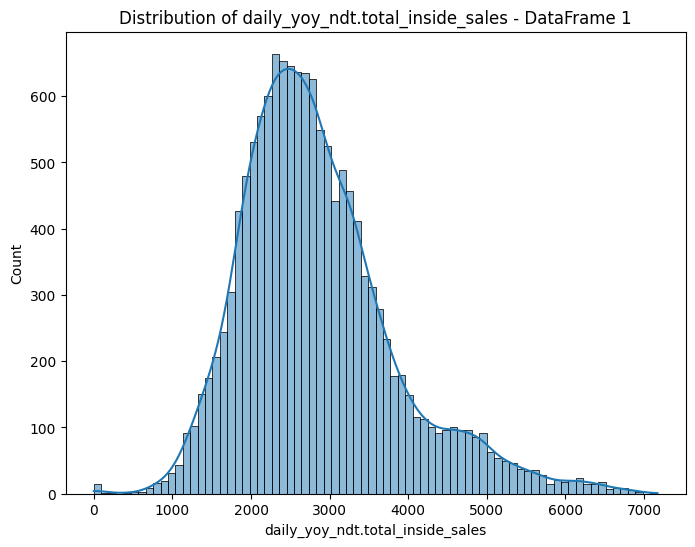

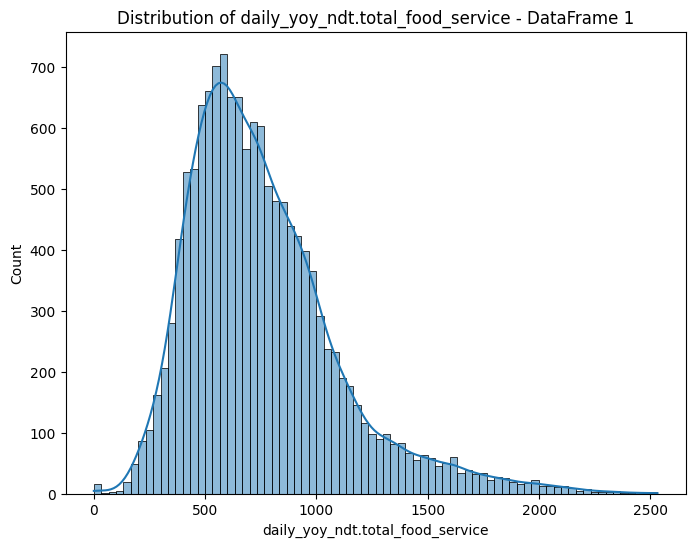

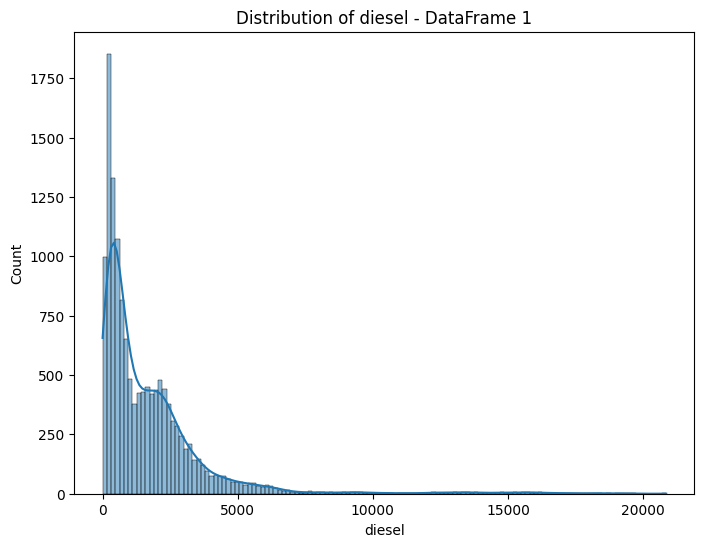

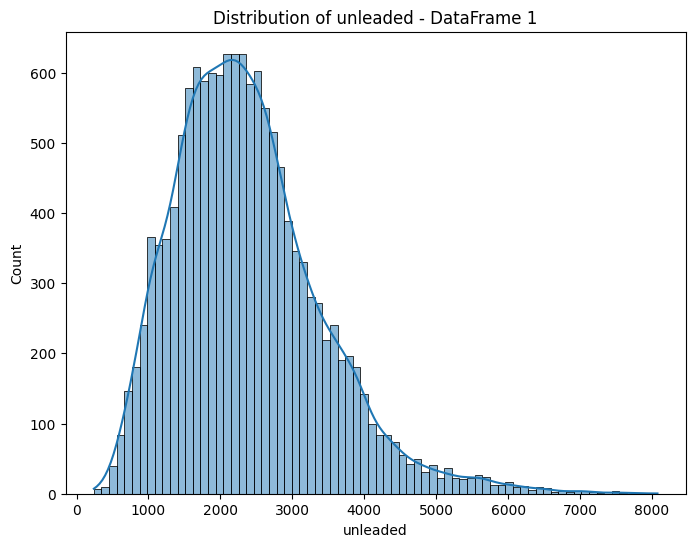

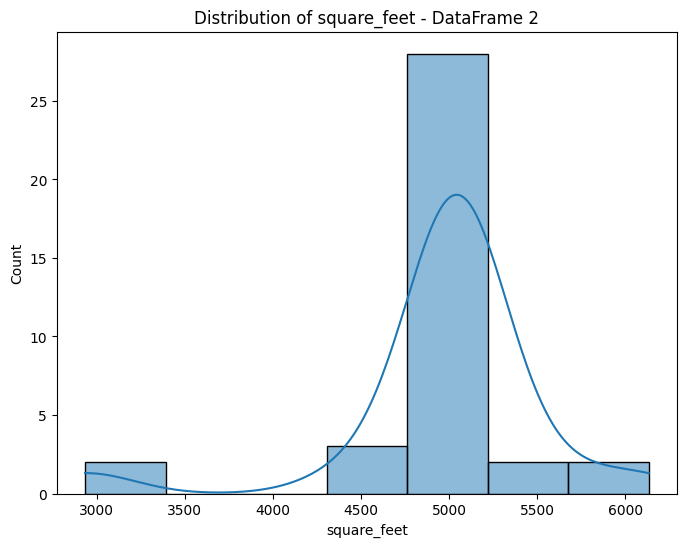

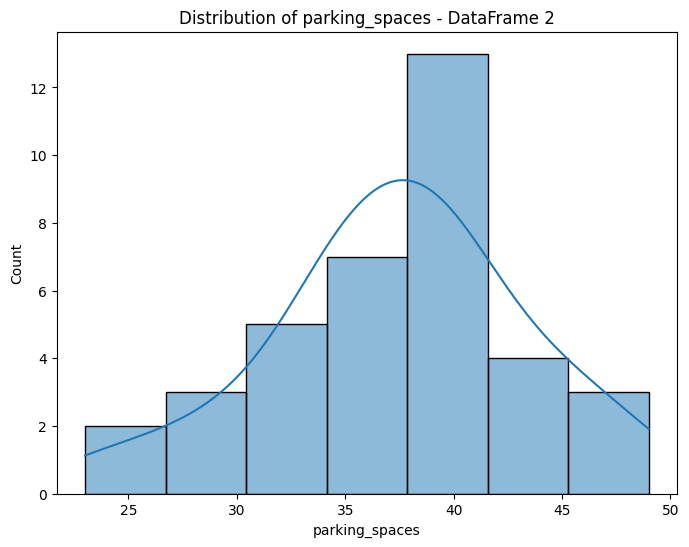

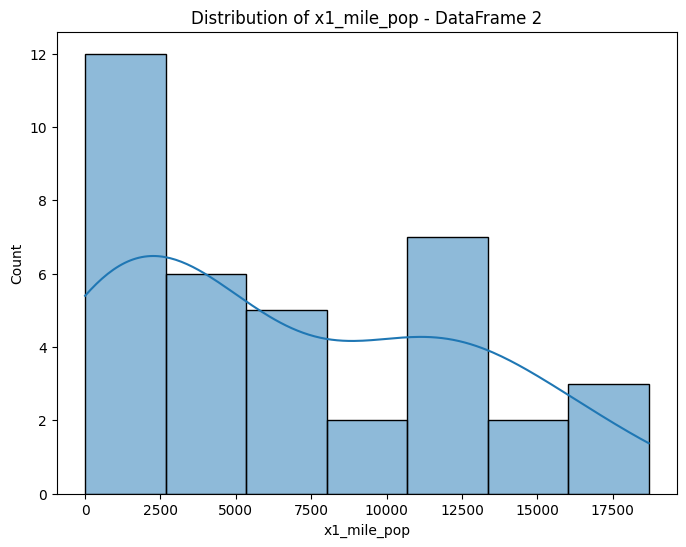

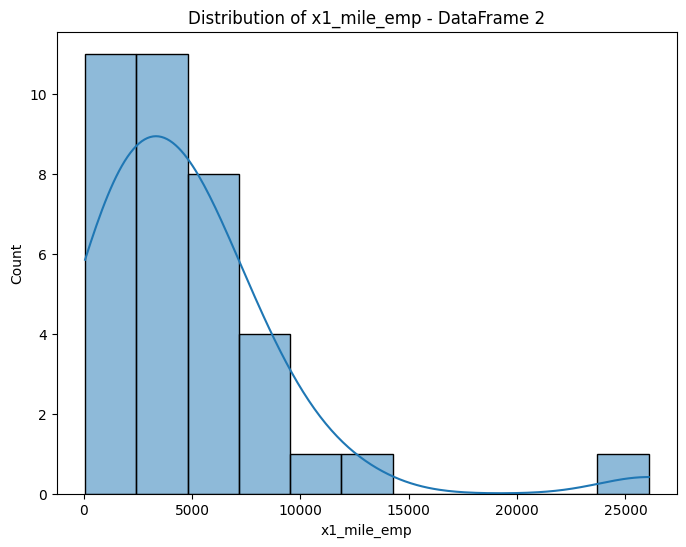

In [3]:
# 1. overview of dataframes
print("DataFrame 1 Overview:")
print(df1.head())
print(df1.info())
print(df1.describe())

print("\nDataFrame 2 Overview:")
print(df2.head())
print(df2.info())
print(df2.describe())

# 2. missing data check
print("\nMissing Data in DataFrame 1:")
print(df1.isnull().sum())

print("\nMissing Data in DataFrame 2:")
print(df2.isnull().sum())

# 3. unique values count
print("\nUnique Values in DataFrame 1:")
for col in df1.columns:
    print(f"{col}: {df1[col].nunique()} unique values")

print("\nUnique Values in DataFrame 2:")
for col in df2.columns:
    print(f"{col}: {df2[col].nunique()} unique values")

# 4. basic visualization
# basic visualization for df1
for col in ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']:
    plt.figure(figsize=(8, 6))
    sns.histplot(df1[col], kde=True)
    plt.title(f"Distribution of {col} - DataFrame 1")
    plt.show()

# basic visualization for df2
for col in ['square_feet', 'parking_spaces', 'x1_mile_pop', 'x1_mile_emp']:
    plt.figure(figsize=(8, 6))
    sns.histplot(df2[col], kde=True)
    plt.title(f"Distribution of {col} - DataFrame 2")
    plt.show()

In [4]:
# 1. Drop columns with only 1 unique value in df2
cols_to_drop = [col for col in df2.columns if df2[col].nunique() == 1]
df2.drop(cols_to_drop, axis=1, inplace=True)

# 2. Remove duplicate columns in df2
df2.drop(['hi_flow_lanes_fueling_positions_2', 'rv_lanes_fueling_positions_2'], axis=1, inplace=True)

# 3. Replace 'N/A' with 'Not Applicable' in df2
df2.replace('N/A', 'Not Applicable', inplace=True)

# 4. Extract year and day of the year from date columns in df1
df1['capital_projects.soft_open_year'] = pd.to_datetime(df1['capital_projects.soft_opening_date']).dt.year
df1['capital_projects.soft_open_day_of_year'] = pd.to_datetime(df1['capital_projects.soft_opening_date']).dt.dayofyear

df1['calendar.calendar_day_year'] = pd.to_datetime(df1['calendar.calendar_day_date']).dt.year
df1['calendar.calendar_day_day_of_year'] = pd.to_datetime(df1['calendar.calendar_day_date']).dt.dayofyear

# 5. Add 'days_since_open' column to df1
df1['days_since_open'] = (pd.to_datetime(df1['calendar.calendar_day_date']) - pd.to_datetime(df1['capital_projects.soft_opening_date'])).dt.days

# 6. Drop the original date columns if they are no longer needed
df1.drop(['capital_projects.soft_opening_date', 'calendar.calendar_day_date'], axis=1, inplace=True)

# 7. Remove 'Unnamed: 0_x' column
df1.drop('Unnamed: 0', axis=1, inplace=True)

# 8. Remove 'Unnamed: 0_x' column
df2.drop('Unnamed: 0', axis=1, inplace=True)


In [5]:
# Merge df1 and df2 on 'site_id_msba'
merged_df = pd.merge(df1, df2, on='site_id_msba', how='inner')

# Check the first few rows of the merged dataframe
print(merged_df.head())



   calendar.fiscal_week_id_for_year calendar.day_of_week  \
0                                25               Friday   
1                                25            Wednesday   
2                                25             Thursday   
3                                26               Sunday   
4                                26               Monday   

  calendar_information.holiday calendar_information.type_of_day  \
0                         NONE                          WEEKDAY   
1                         NONE                          WEEKDAY   
2                         NONE                          WEEKDAY   
3                         NONE                          WEEKEND   
4                         NONE                          WEEKDAY   

   daily_yoy_ndt.total_inside_sales  daily_yoy_ndt.total_food_service  \
0                         2168.2920                          861.6930   
1                         2051.5635                          808.0275   
2                

In [6]:
# Print the data types of each column in the merged DataFrame
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13542 entries, 0 to 13541
Data columns (total 57 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   calendar.fiscal_week_id_for_year         13542 non-null  int64  
 1   calendar.day_of_week                     13542 non-null  object 
 2   calendar_information.holiday             13542 non-null  object 
 3   calendar_information.type_of_day         13542 non-null  object 
 4   daily_yoy_ndt.total_inside_sales         13542 non-null  float64
 5   daily_yoy_ndt.total_food_service         13542 non-null  float64
 6   diesel                                   13542 non-null  float64
 7   unleaded                                 13542 non-null  float64
 8   site_id_msba                             13542 non-null  int64  
 9   capital_projects.soft_open_year          13542 non-null  int64  
 10  capital_projects.soft_open_day_of_year   13542

In [7]:
# Selecting only the object-type columns for one-hot encoding
object_cols = merged_df.select_dtypes(include='object').columns

# Applying one-hot encoding
encoded_df = pd.get_dummies(merged_df, columns=object_cols)

# Check the first few rows of the new DataFrame
print(encoded_df.head())

   calendar.fiscal_week_id_for_year  daily_yoy_ndt.total_inside_sales  \
0                                25                         2168.2920   
1                                25                         2051.5635   
2                                25                         2257.5000   
3                                26                         1520.5925   
4                                26                         1897.6930   

   daily_yoy_ndt.total_food_service    diesel   unleaded  site_id_msba  \
0                          861.6930  722.7745  1425.1020         24535   
1                          808.0275  730.4850  1436.2740         24535   
2                          966.4410  895.7970  1594.3725         24535   
3                          542.3250  584.2900  1124.9280         24535   
4                          771.4525  852.2605  1640.2540         24535   

   capital_projects.soft_open_year  capital_projects.soft_open_day_of_year  \
0                             2022    

In [8]:
# Print the data types of each column in the merged DataFrame
print(encoded_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13542 entries, 0 to 13541
Columns: 111 entries, calendar.fiscal_week_id_for_year to hi_flow_rv_lanes_stack_type_None
dtypes: float64(4), int64(30), uint8(77)
memory usage: 4.6 MB
None


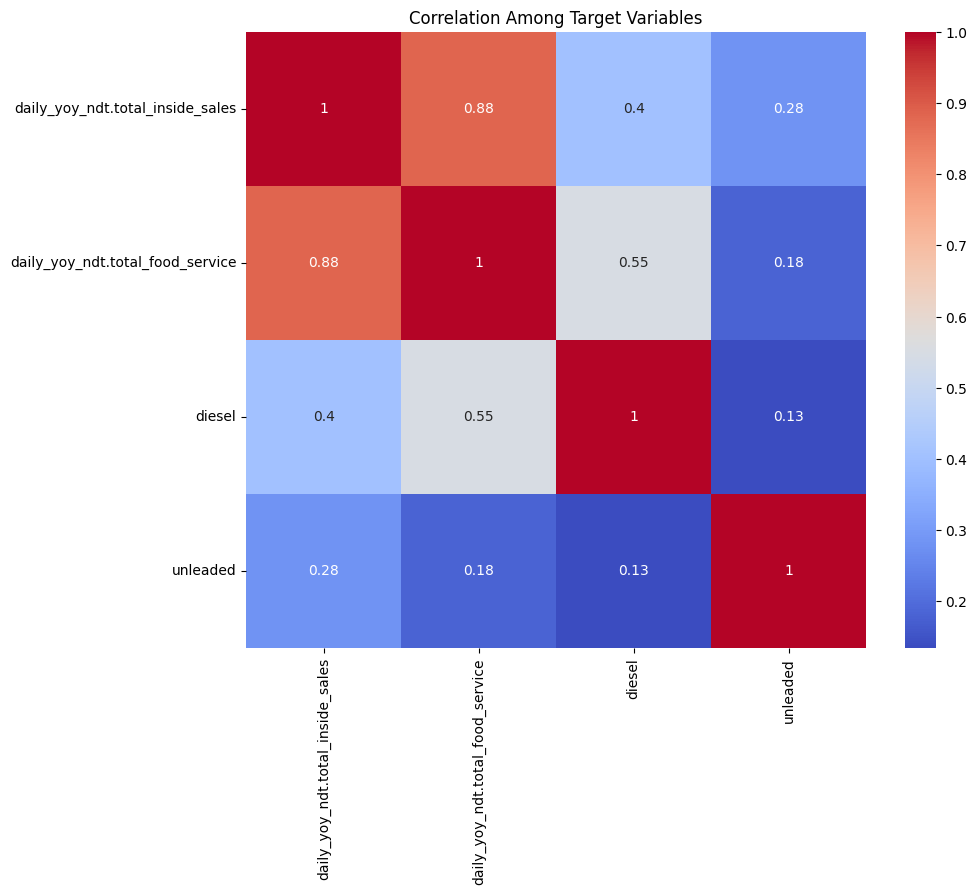

In [9]:
# Selecting the target variables
targets = ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']

# Calculating the correlation matrix for the target variables
corr_targets = encoded_df[targets].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_targets, annot=True, cmap='coolwarm')
plt.title("Correlation Among Target Variables")
plt.show()

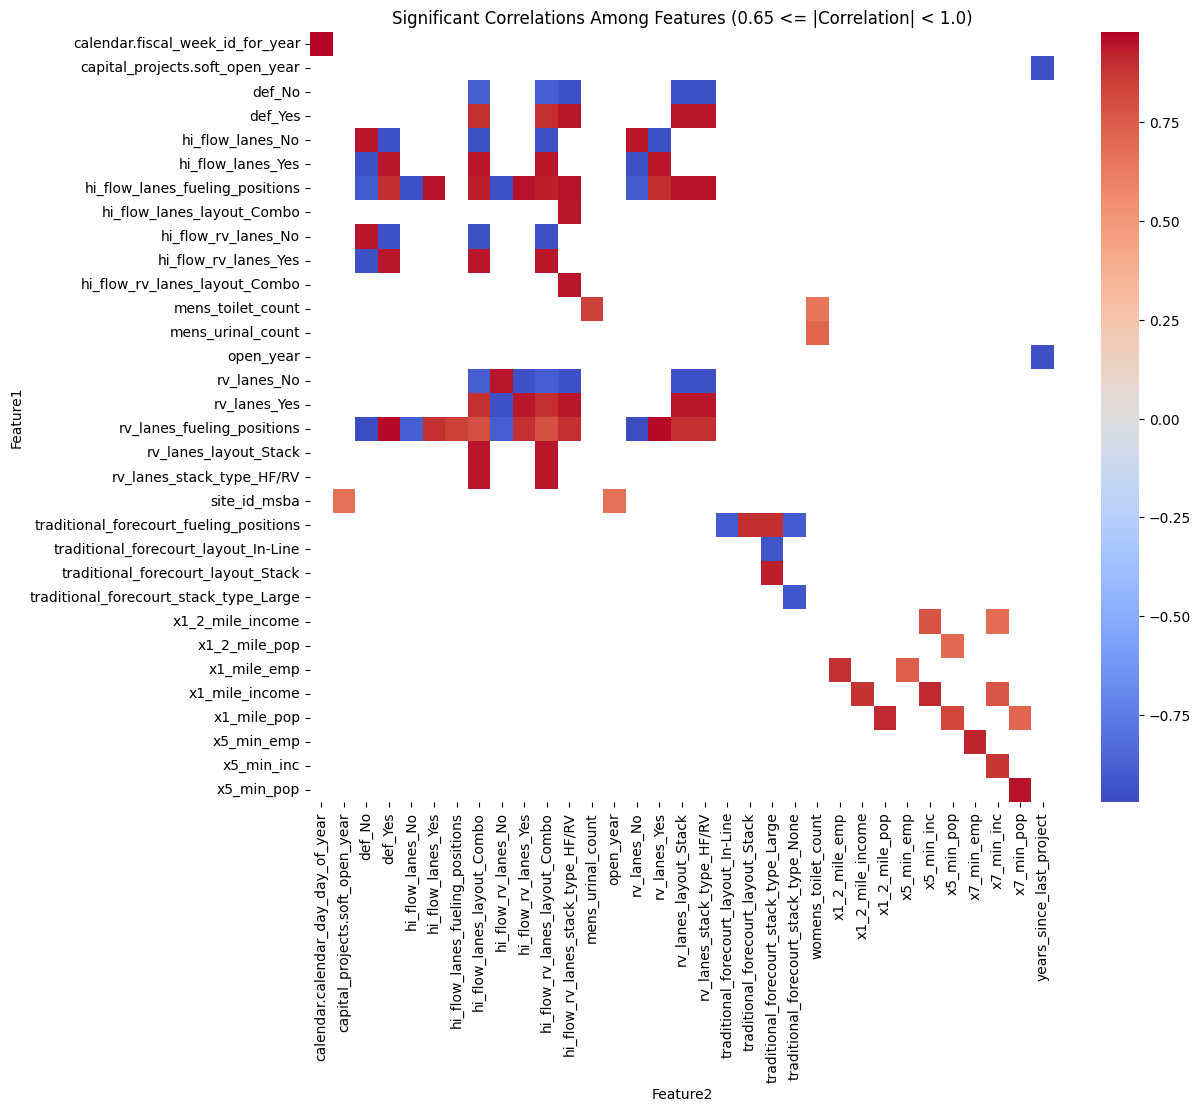

In [10]:
# Set correlation threshold
correlation_lower_threshold = 0.65
correlation_upper_threshold = 0.99

# Calculating the correlation matrix for all features (excluding the target variables)
features = encoded_df.drop(targets, axis=1)
corr_features = features.corr()

# Filtering and sorting correlation values
significant_corr_features = corr_features.where(np.triu(np.ones(corr_features.shape), k=1).astype(bool))
significant_corr_features = significant_corr_features.stack().reset_index()
significant_corr_features.columns = ['Feature1', 'Feature2', 'Correlation']
significant_corr_features = significant_corr_features.dropna().sort_values(by='Correlation', ascending=False)

# Filter out correlations outside the specified range
significant_corr_features = significant_corr_features[
    (significant_corr_features['Correlation'].abs() >= correlation_lower_threshold) &
    (significant_corr_features['Correlation'].abs() < correlation_upper_threshold)]

# Visualizing the significant correlations using a heatmap
# First, reshape the data to a pivot table suitable for a heatmap
pivot_table = significant_corr_features.pivot('Feature1', 'Feature2', 'Correlation')

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, cmap='coolwarm', annot=False)
plt.title("Significant Correlations Among Features (0.65 <= |Correlation| < 1.0)")
plt.show()

In [11]:
# Threshold for filtering significant correlations
correlation_threshold = 0.25

# Combining features and targets for correlation analysis
combined = pd.concat([features, encoded_df[targets]], axis=1)

# Calculating the correlation matrix between features and targets
corr_combined = combined.corr()
corr_features_targets = corr_combined.loc[features.columns, targets]

# Filtering and sorting correlation values
significant_corr = corr_features_targets[corr_features_targets.abs() > correlation_threshold].stack().reset_index()
significant_corr.columns = ['Feature', 'Target', 'Correlation']
significant_corr = significant_corr.dropna().sort_values(by='Correlation', ascending=False)

# Displaying the significant correlations
print(significant_corr)


                                     Feature  \
20           hi_flow_lanes_fueling_positions   
24                         mens_urinal_count   
22                         mens_toilet_count   
28                         womens_sink_count   
19           hi_flow_lanes_fueling_positions   
52                         hi_flow_lanes_Yes   
91         hi_flow_rv_lanes_stack_type_HF/RV   
82                 rv_lanes_stack_type_HF/RV   
64                      hi_flow_rv_lanes_Yes   
79                     rv_lanes_layout_Stack   
53                         hi_flow_lanes_Yes   
65                      hi_flow_rv_lanes_Yes   
92         hi_flow_rv_lanes_stack_type_HF/RV   
80                     rv_lanes_layout_Stack   
83                 rv_lanes_stack_type_HF/RV   
58                              rv_lanes_Yes   
70                                   def_Yes   
86                hi_flow_lanes_layout_Combo   
89             hi_flow_rv_lanes_layout_Combo   
73                            cat_scales

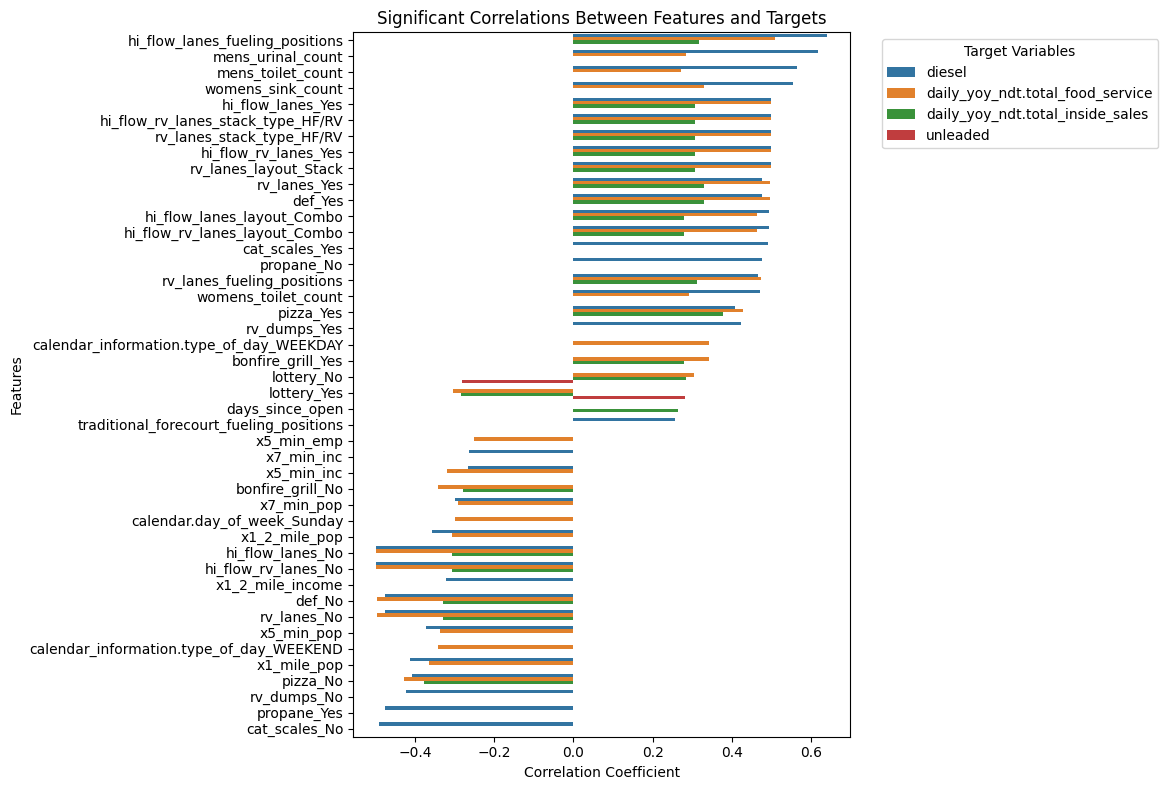

In [12]:
# Plotting the significant correlations
plt.figure(figsize=(12, 8))
sns.barplot(data=significant_corr, x='Correlation', y='Feature', hue='Target')
plt.title('Significant Correlations Between Features and Targets')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.legend(title='Target Variables', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

# 1. Identify Unique Stores
unique_stores = encoded_df['site_id_msba'].unique()

# 2. Selects random stores for testing
np.random.seed(69)  # For reproducibility
test_stores = np.random.choice(unique_stores, 5, replace=False)

In [14]:
# 3. Split the Data
# Define the feature set (X) and the target set (y)
X = encoded_df.drop(['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded'], axis=1)
y = encoded_df[['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']]

In [15]:
# Splitting based on the store identifier
X_train = X[~X['site_id_msba'].isin(test_stores)]
y_train = y.loc[X_train.index]
X_test = X[X['site_id_msba'].isin(test_stores)]
y_test = y.loc[X_test.index]

In [16]:
# Checking the dimensions of the train and test sets
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (11712, 107)
X_test: (1830, 107)
y_train: (11712, 4)
y_test: (1830, 4)


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initializing the Random Forest Regressor for multi-output
multioutput_rf_regressor = RandomForestRegressor(n_estimators=100, random_state=101)

# Training the model on the training data
multioutput_rf_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = multioutput_rf_regressor.predict(X_test)

# Evaluating the model
# Here we use RMSE (Root Mean Squared Error) for each target variable
rmse_scores = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))

# Print RMSE scores for each target
for i, col in enumerate(y.columns):
    print(f"RMSE for {col}: {rmse_scores[i]}")

RMSE for daily_yoy_ndt.total_inside_sales: 519.5520854224624
RMSE for daily_yoy_ndt.total_food_service: 169.90725927838622
RMSE for diesel: 413.61391248689597
RMSE for unleaded: 1669.6766360892007


In [18]:
def forecast_and_evaluate(X_test, y_test, model, days_threshold, targets):
    # Predict for the entire period
    y_predicted = model.predict(X_test)

    # Initialize storage for forecasts and errors
    total_sales_forecasts = {target: {'observed': 0, 'forecasted': 0, 'total': 0} for target in targets}
    rmse_scores = {target: None for target in targets}

    # Determine the index where the observation period ends
    observed_index = X_test['days_since_open'] <= days_threshold

    for target in targets:
        # Calculate observed and forecasted sales
        total_sales_forecasts[target]['observed'] = (y_test.loc[observed_index, target].sum())/5

        total_sales_forecasts[target]['forecasted'] = (y_predicted[~observed_index, targets.index(target)].sum())/5

        total_sales_forecasts[target]['total'] = (total_sales_forecasts[target]['observed'] + total_sales_forecasts[target]['forecasted'])

        # Calculate RMSE only for the forecasted period
        rmse_scores[target] = np.sqrt(mean_squared_error(y_test.loc[~observed_index, target], y_predicted[~observed_index, targets.index(target)]))

        # Calculate total and average RMSE for compatibility
    avg_rmse_scores = {target: rmse_scores[target] for target in targets}  # Assuming one value per target
    total_rmse_scores = {target: (rmse_scores[target] * len(y_test[~observed_index]))/5 for target in targets}

    return avg_rmse_scores, total_rmse_scores, total_sales_forecasts


In [19]:
def print_sales_forecast_details(total_sales_forecasts, rmse_scores_avg, rmse_scores_total, period_name):
    print(f"--- {period_name} ---")
    for target in total_sales_forecasts:
        print(f"{target}:")
        print(f"  Observed Revenue: {total_sales_forecasts[target]['observed']}")
        print(f"  Projected Revenue: {total_sales_forecasts[target]['forecasted']}")
        print(f"  Total Revenue: {total_sales_forecasts[target]['total']}")
        print(f"  Average RMSE: {rmse_scores_avg[target]}")
        print(f"  Total RMSE: {rmse_scores_total[target]}")
    print("\n")

In [20]:
# Define your observation periods
observation_periods = [(13, "Two Week"), (20, "Three Week"), (182, "Six Month")]

# Loop through each observation period and evaluate forecasts
for days_threshold, period_name in observation_periods:
    avg_rmse_scores, total_rmse_scores, total_sales_forecasts = forecast_and_evaluate(X_test, y_test, multioutput_rf_regressor, days_threshold, targets)

    # Print the details for this observation period
    print_sales_forecast_details(total_sales_forecasts, avg_rmse_scores, total_rmse_scores, period_name)


--- Two Week ---
daily_yoy_ndt.total_inside_sales:
  Observed Revenue: 26796.7434
  Projected Revenue: 898976.7163229998
  Total Revenue: 925773.4597229998
  Average RMSE: 515.3620164466236
  Total RMSE: 181407.42978921148
daily_yoy_ndt.total_food_service:
  Observed Revenue: 7849.337300000001
  Projected Revenue: 217358.39712300003
  Total Revenue: 225207.73442300005
  Average RMSE: 168.44285427651013
  Total RMSE: 59291.88470533157
diesel:
  Observed Revenue: 9388.877400000001
  Projected Revenue: 375852.266433
  Total Revenue: 385241.143833
  Average RMSE: 416.0813322321528
  Total RMSE: 146460.6289457178
unleaded:
  Observed Revenue: 24221.8676
  Projected Revenue: 847393.200682
  Total Revenue: 871615.068282
  Average RMSE: 1695.3917582101917
  Total RMSE: 596777.8988899875


--- Three Week ---
daily_yoy_ndt.total_inside_sales:
  Observed Revenue: 41935.89750000001
  Projected Revenue: 883920.4216290001
  Total Revenue: 925856.3191290001
  Average RMSE: 514.7478206422788
  Total R

Plotting chart for daily_yoy_ndt.total_inside_sales


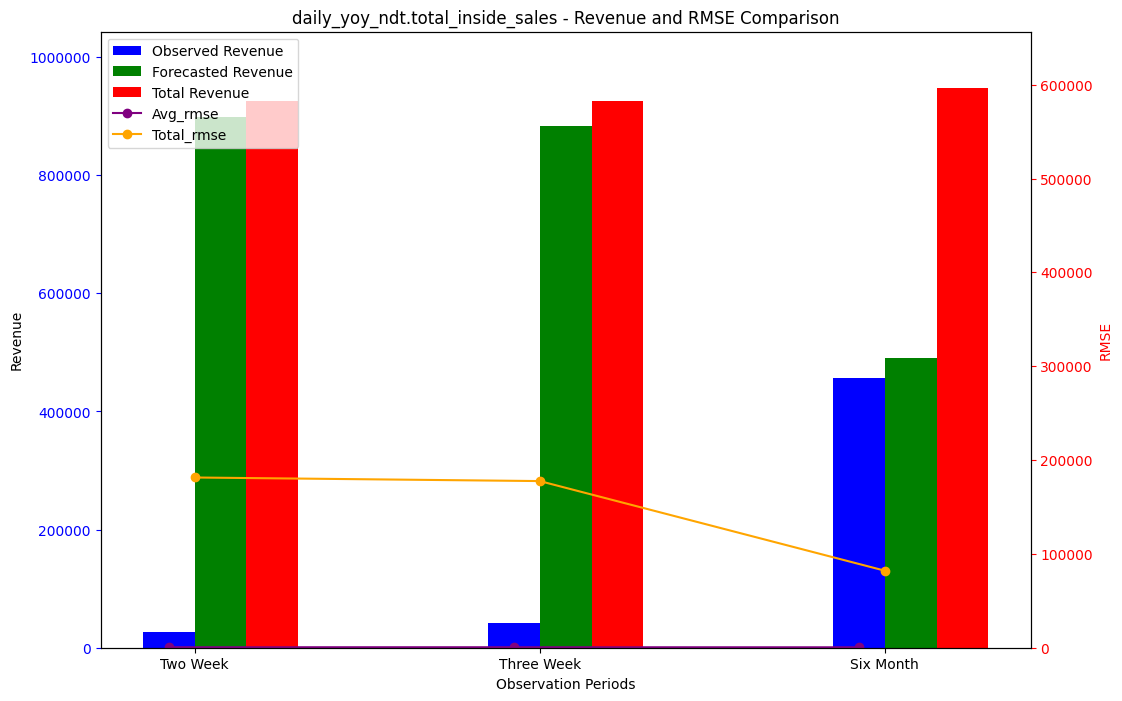

Plotting chart for daily_yoy_ndt.total_food_service


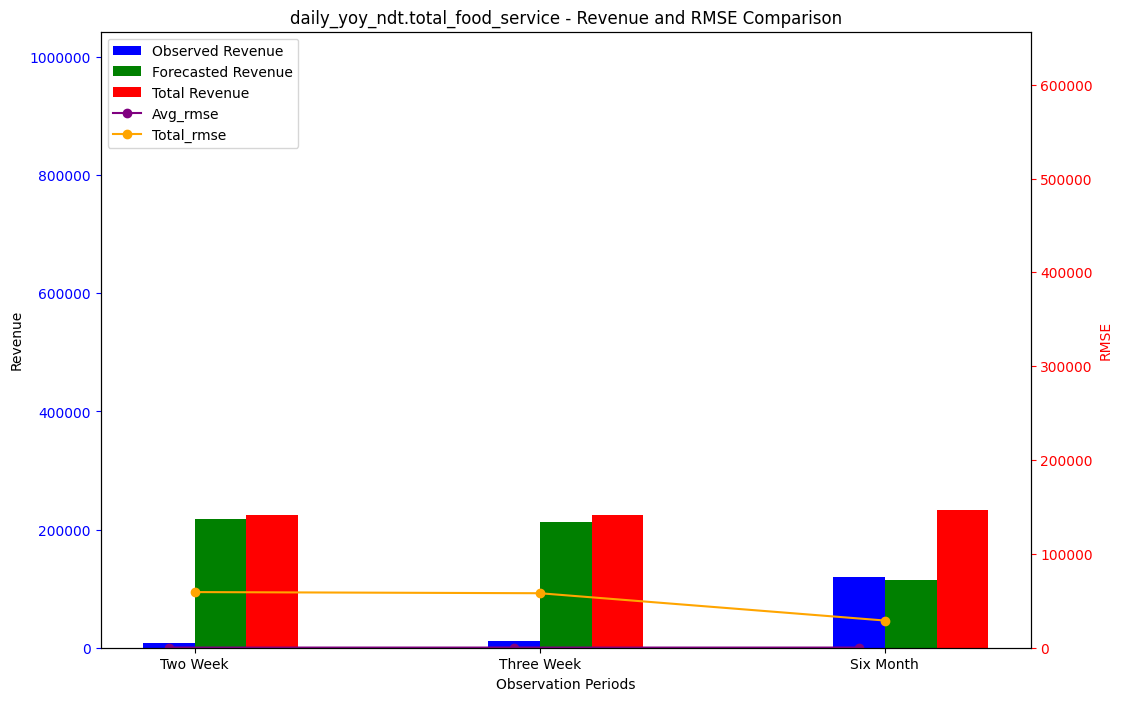

Plotting chart for diesel


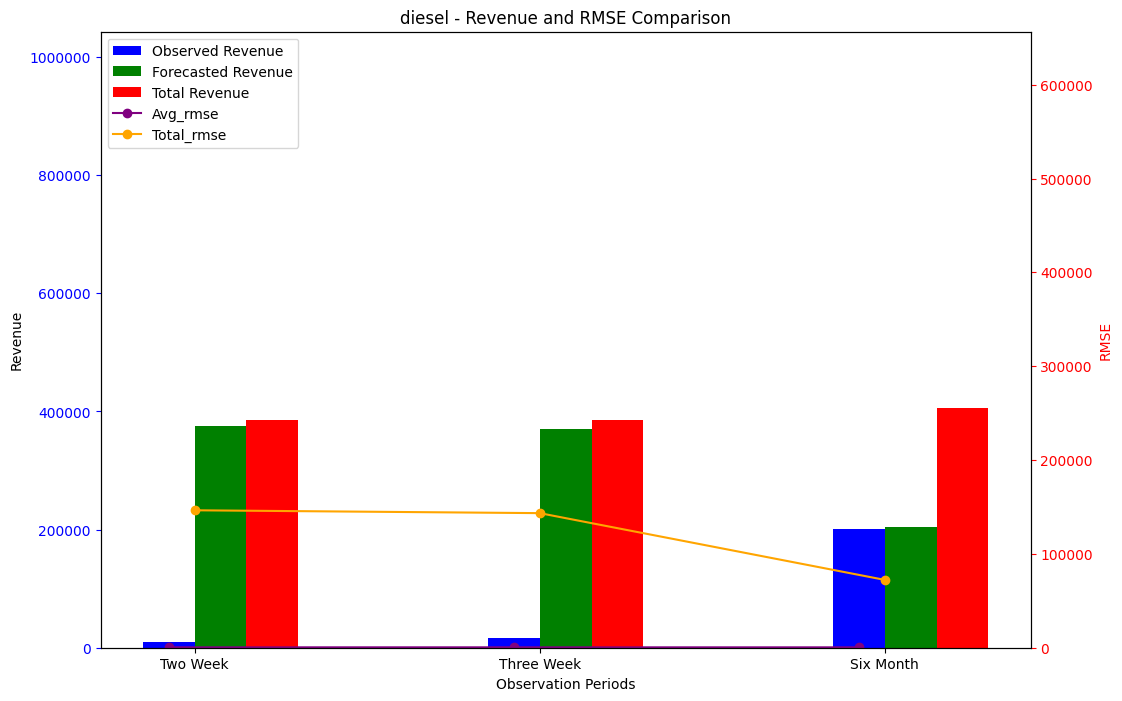

Plotting chart for unleaded


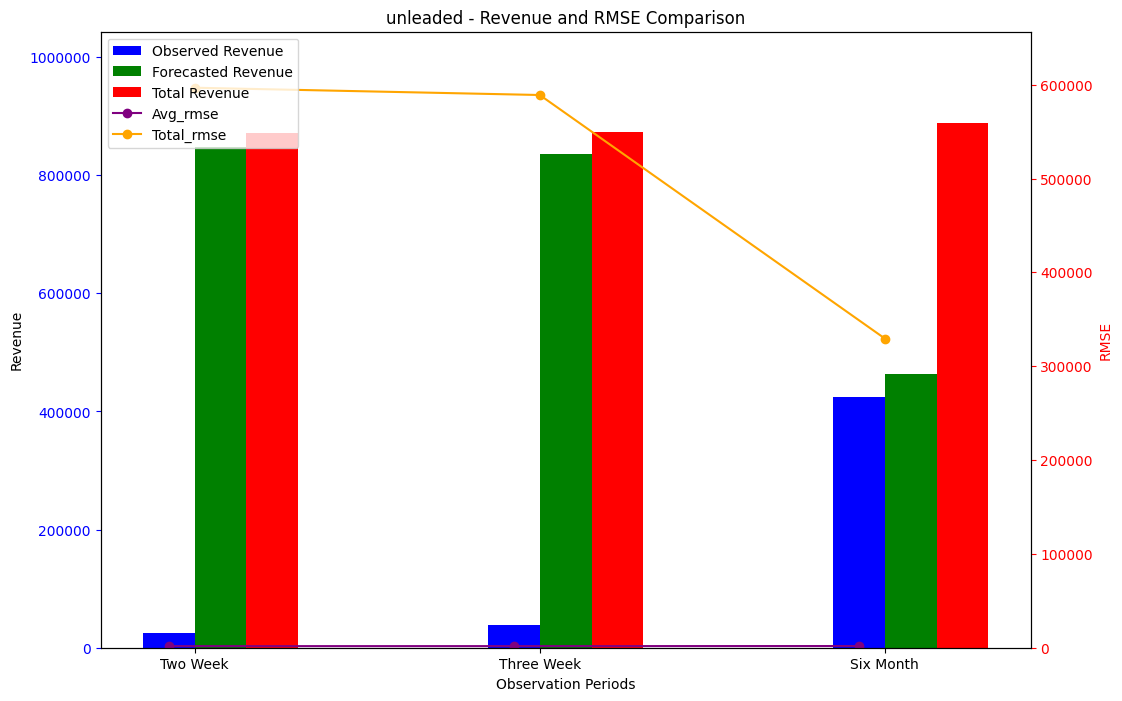

In [21]:
def find_max_values(results):
    max_revenue = 0
    max_rmse = 0
    for result in results:
        max_revenue = max(max_revenue, max(result[-1][target]['total'] for target in targets))
        max_rmse = max(max_rmse, max(result[1][target] for target in targets))
    return max_revenue, max_rmse

# Running the evaluations for Random Forest with different observation periods
rf_two_week_results = forecast_and_evaluate(X_test, y_test, multioutput_rf_regressor, 13, targets)
rf_three_week_results = forecast_and_evaluate(X_test, y_test, multioutput_rf_regressor, 20, targets)
rf_six_month_results = forecast_and_evaluate(X_test, y_test, multioutput_rf_regressor, 182, targets)

# Finding max values for scales
max_revenue, max_rmse = find_max_values([rf_two_week_results, rf_three_week_results, rf_six_month_results])

# Adding a buffer to the max values for scale consistency
revenue_limit = max_revenue * 1.1  # 10% extra buffer
rmse_limit = max_rmse * 1.1        # 10% extra buffer

# Updated plotting function
def plot_revenue_rmse_for_target(target, two_week_results, three_week_results, six_month_results):
    periods = ['Two Week', 'Three Week', 'Six Month']
    metrics = ['observed', 'forecasted', 'total']
    rmse_metrics = ['avg_rmse', 'total_rmse']
    colors = ['blue', 'green', 'red', 'purple', 'orange']

    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Revenue Bar Chart
    bar_width = 0.15
    index = np.arange(len(periods))

    for i, metric in enumerate(metrics):
        data_to_plot = [two_week_results[-1][target][metric], three_week_results[-1][target][metric], six_month_results[-1][target][metric]]
        ax1.bar(index + i * bar_width, data_to_plot, bar_width, color=colors[i], label=f'{metric.capitalize()} Revenue')

    ax1.set_xlabel('Observation Periods')
    ax1.set_ylabel('Revenue')
    ax1.tick_params('y', colors='blue')
    ax1.set_ylim(0, revenue_limit)  # Consistent y-axis limit for revenue
    ax1.ticklabel_format(style='plain', axis='y')
    ax1.set_xticks(index + bar_width / 2)
    ax1.set_xticklabels(periods)
    ax1.set_title(f'{target} - Revenue and RMSE Comparison')

    # Secondary axis for RMSE
    ax2 = ax1.twinx()
    for i, rmse_metric in enumerate(rmse_metrics):
        rmse_data_to_plot = [two_week_results[0 if rmse_metric == 'avg_rmse' else 1][target], three_week_results[0 if rmse_metric == 'avg_rmse' else 1][target], six_month_results[0 if rmse_metric == 'avg_rmse' else 1][target]]
        ax2.plot(index + i * bar_width / 2, rmse_data_to_plot, color=colors[i + 3], marker='o', label=f'{rmse_metric.capitalize()}')

    ax2.set_ylabel('RMSE', color='red')
    ax2.tick_params('y', colors='red')
    ax2.set_ylim(0, rmse_limit)  # Consistent y-axis limit for RMSE
    ax2.ticklabel_format(style='plain', axis='y')

    # Combine legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.show()

# Plotting charts for each target variable
for target in targets:
    print(f"Plotting chart for {target}")
    plot_revenue_rmse_for_target(target, rf_two_week_results, rf_three_week_results, rf_six_month_results)


In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Define the parameter distribution
param_dist_rf = {
    'n_estimators': sp_randint(100, 300),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 5),
    'max_features': ['auto', 'sqrt']
}

# Create RandomizedSearchCV
random_search_rf = RandomizedSearchCV(multioutput_rf_regressor, param_distributions=param_dist_rf,
                                      n_iter=7, cv=4, scoring='neg_mean_squared_error', random_state=69)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Best parameters
best_parameters_rf = random_search_rf.best_params_
print(f"Best parameters for Random Forest: {best_parameters_rf}")

# Retrain model with the best parameters
multioutput_rf_regressor.set_params(**best_parameters_rf)
multioutput_rf_regressor.fit(X_train, y_train)

Best parameters for Random Forest: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 248}


RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=9, n_estimators=248, random_state=101)

In [23]:
# Run evaluations after tuning
tuned_rf_two_week_results = forecast_and_evaluate(X_test, y_test, multioutput_rf_regressor, 13, targets)
tuned_rf_three_week_results = forecast_and_evaluate(X_test, y_test, multioutput_rf_regressor, 20, targets)
tuned_rf_six_month_results = forecast_and_evaluate(X_test, y_test, multioutput_rf_regressor, 182, targets)

def print_comparison_with_difference(initial_results, tuned_results, period_name):
    initial_avg_rmse, initial_total_rmse, initial_sales_forecasts = initial_results
    tuned_avg_rmse, tuned_total_rmse, tuned_sales_forecasts = tuned_results

    print(f"--- {period_name} ---")
    print("Before Tuning / After Tuning / Difference")
    for target in targets:
        print(f"{target}:")
        observed_diff = tuned_sales_forecasts[target]['observed'] - initial_sales_forecasts[target]['observed']
        projected_diff = tuned_sales_forecasts[target]['forecasted'] - initial_sales_forecasts[target]['forecasted']
        total_diff = tuned_sales_forecasts[target]['total'] - initial_sales_forecasts[target]['total']
        avg_rmse_diff = tuned_avg_rmse[target] - initial_avg_rmse[target]
        total_rmse_diff = tuned_total_rmse[target] - initial_total_rmse[target]

        # Formatting the differences
        observed_diff_str = f"+{observed_diff}" if observed_diff > 0 else f"{observed_diff}"
        projected_diff_str = f"+{projected_diff}" if projected_diff > 0 else f"{projected_diff}"
        total_diff_str = f"+{total_diff}" if total_diff > 0 else f"{total_diff}"
        avg_rmse_diff_str = f"+{avg_rmse_diff}" if avg_rmse_diff > 0 else f"{avg_rmse_diff}"
        total_rmse_diff_str = f"+{total_rmse_diff}" if total_rmse_diff > 0 else f"{total_rmse_diff}"

        print(f"  Observed Revenue: {initial_sales_forecasts[target]['observed']} / {tuned_sales_forecasts[target]['observed']} / {observed_diff_str}")
        print(f"  Projected Revenue: {initial_sales_forecasts[target]['forecasted']} / {tuned_sales_forecasts[target]['forecasted']} / {projected_diff_str}")
        print(f"  Total Revenue: {initial_sales_forecasts[target]['total']} / {tuned_sales_forecasts[target]['total']} / {total_diff_str}")
        print(f"  Average RMSE: {initial_avg_rmse[target]} / {tuned_avg_rmse[target]} / {avg_rmse_diff_str}")
        print(f"  Total RMSE: {initial_total_rmse[target]} / {tuned_total_rmse[target]} / {total_rmse_diff_str}")
    print("\n")

# Comparing results with difference for each observation period
print_comparison_with_difference(rf_two_week_results, tuned_rf_two_week_results, "Two Week Observation Period")
print_comparison_with_difference(rf_three_week_results, tuned_rf_three_week_results, "Three Week Observation Period")
print_comparison_with_difference(rf_six_month_results, tuned_rf_six_month_results, "Six Month Observation Period")

--- Two Week Observation Period ---
Before Tuning / After Tuning / Difference
daily_yoy_ndt.total_inside_sales:
  Observed Revenue: 26796.7434 / 26796.7434 / 0.0
  Projected Revenue: 898976.7163229998 / 903836.5137379069 / +4859.797414907138
  Total Revenue: 925773.4597229998 / 930633.257137907 / +4859.797414907138
  Average RMSE: 515.3620164466236 / 483.7430861828324 / -31.61893026379113
  Total RMSE: 181407.42978921148 / 170277.566336357 / -11129.863452854479
daily_yoy_ndt.total_food_service:
  Observed Revenue: 7849.337300000001 / 7849.337300000001 / 0.0
  Projected Revenue: 217358.39712300003 / 225470.36684082952 / +8111.969717829488
  Total Revenue: 225207.73442300005 / 233319.70414082953 / +8111.969717829488
  Average RMSE: 168.44285427651013 / 143.8325092771005 / -24.61034499940962
  Total RMSE: 59291.88470533157 / 50629.04326553938 / -8662.841439792188
diesel:
  Observed Revenue: 9388.877400000001 / 9388.877400000001 / 0.0
  Projected Revenue: 375852.266433 / 472278.813434684 /

In [24]:
def plot_feature_importance_with_correlation(model, feature_names, model_name, target_variables, data, top_n=10):
    """
    Plots the top N most important features of the given model with color coding based on correlation.

    :param model: The trained model.
    :param feature_names: List of feature names.
    :param model_name: Name of the model (for title).
    :param target_variables: List of target variable names.
    :param data: DataFrame containing the features and targets.
    :param top_n: Number of top features to display.
    """
    # Extract feature importances and pair with feature names
    feature_importances = model.feature_importances_
    features = list(zip(feature_names, feature_importances))

    # Sort features by their importance
    sorted_features = sorted(features, key=lambda x: x[1], reverse=True)

    # Select top N features
    top_features = sorted_features[:top_n]
    top_feature_names = [feature[0] for feature in top_features]

    # Calculating correlation with target variables
    correlations = data[top_feature_names + target_variables].corr()

    # Colors based on correlation
    colors = []
    for feature in top_feature_names:
        # Average correlation with all target variables
        avg_corr = correlations.loc[feature, target_variables].mean()
        colors.append('blue' if avg_corr >= 0 else 'red')

    # Plotting
    y_pos = np.arange(len(top_feature_names))
    top_importances = [feature[1] for feature in top_features]

    plt.figure(figsize=(10, 6))
    plt.barh(y_pos, top_importances, align='center', alpha=0.7, color=colors)
    plt.yticks(y_pos, top_feature_names)
    plt.xlabel('Importance')
    plt.title(f'Top {top_n} Features in {model_name}')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
    plt.show()

# create feature names
feature_names = X_train.columns.tolist()

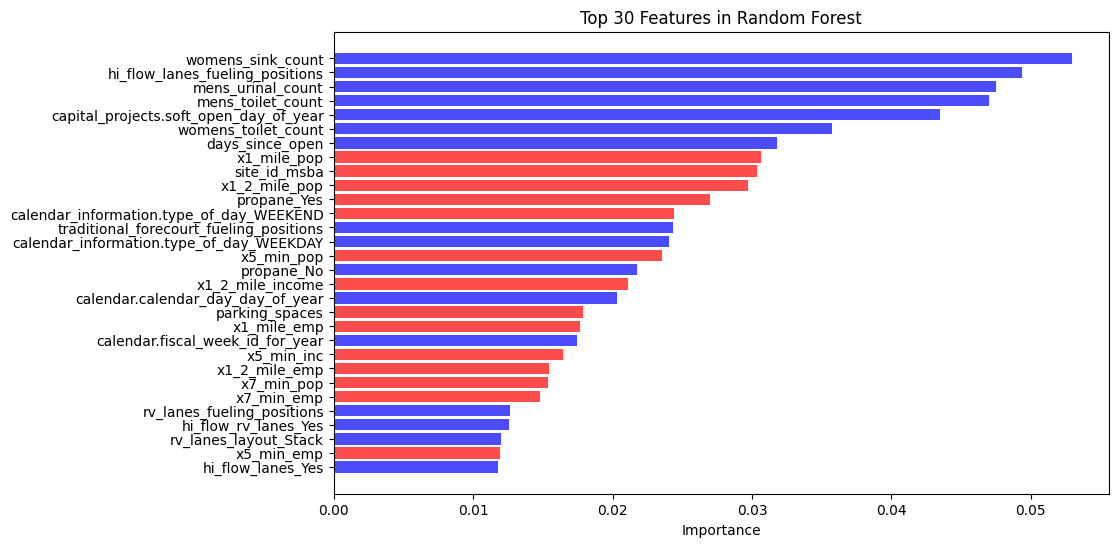

In [25]:
# Random Forest model feature importance
plot_feature_importance_with_correlation(
    multioutput_rf_regressor,
    feature_names,
    'Random Forest',
    targets,
    encoded_df,  # Assuming 'encoded_df' contains both features and targets
    top_n=30
)


In [26]:
!pip install xgboost

In [27]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor

# Initialize the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=101)

# Wrap it with MultiOutputRegressor to handle multiple targets
multioutput_xgb_regressor = MultiOutputRegressor(xgb_regressor)

# Train the model on the training data
multioutput_xgb_regressor.fit(X_train, y_train)

# The model is now trained and can be used for predictions


MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=101, ...))

In [28]:
# Making predictions on the test set
y_pred = multioutput_xgb_regressor.predict(X_test)

# Calculating RMSE for each target variable
rmse_scores = {}
for i, col in enumerate(y_test.columns):
    rmse = np.sqrt(mean_squared_error(y_test[col], y_pred[:, i]))
    rmse_scores[col] = rmse

# Displaying the RMSE scores
for target, rmse in rmse_scores.items():
    print(f"RMSE for {target}: {rmse}")


RMSE for daily_yoy_ndt.total_inside_sales: 1145.0304678425027
RMSE for daily_yoy_ndt.total_food_service: 163.74366981696744
RMSE for diesel: 1090.42353798082
RMSE for unleaded: 1453.7933203534612


In [29]:
# Running the evaluations for XGBoost with different observation periods
xgb_two_week_results = forecast_and_evaluate(X_test, y_test, multioutput_xgb_regressor, 13, targets)
xgb_three_week_results = forecast_and_evaluate(X_test, y_test, multioutput_xgb_regressor, 20, targets)
xgb_six_month_results = forecast_and_evaluate(X_test, y_test, multioutput_xgb_regressor, 182, targets)

# Printing results
print_sales_forecast_details(xgb_two_week_results[-1], xgb_two_week_results[0], xgb_two_week_results[1], "Two Week Observation Period")
print_sales_forecast_details(xgb_three_week_results[-1], xgb_three_week_results[0], xgb_three_week_results[1], "Three Week Observation Period")
print_sales_forecast_details(xgb_six_month_results[-1], xgb_six_month_results[0], xgb_six_month_results[1], "Six Month Observation Period")



--- Two Week Observation Period ---
daily_yoy_ndt.total_inside_sales:
  Observed Revenue: 26796.7434
  Projected Revenue: 1150746.1
  Total Revenue: 1177542.8434000001
  Average RMSE: 1155.0230112882034
  Total RMSE: 406568.0999734476
daily_yoy_ndt.total_food_service:
  Observed Revenue: 7849.337300000001
  Projected Revenue: 243170.25
  Total Revenue: 251019.5873
  Average RMSE: 161.43903875313742
  Total RMSE: 56826.54164110437
diesel:
  Observed Revenue: 9388.877400000001
  Projected Revenue: 572274.3
  Total Revenue: 581663.1774
  Average RMSE: 1107.8298041344083
  Total RMSE: 389956.0910553117
unleaded:
  Observed Revenue: 24221.8676
  Projected Revenue: 522066.3
  Total Revenue: 546288.1676
  Average RMSE: 1470.334299492944
  Total RMSE: 517557.67342151626


--- Three Week Observation Period ---
daily_yoy_ndt.total_inside_sales:
  Observed Revenue: 41935.89750000001
  Projected Revenue: 1132519.3
  Total Revenue: 1174455.1975
  Average RMSE: 1157.1909829817941
  Total RMSE: 39923

Plotting chart for daily_yoy_ndt.total_inside_sales


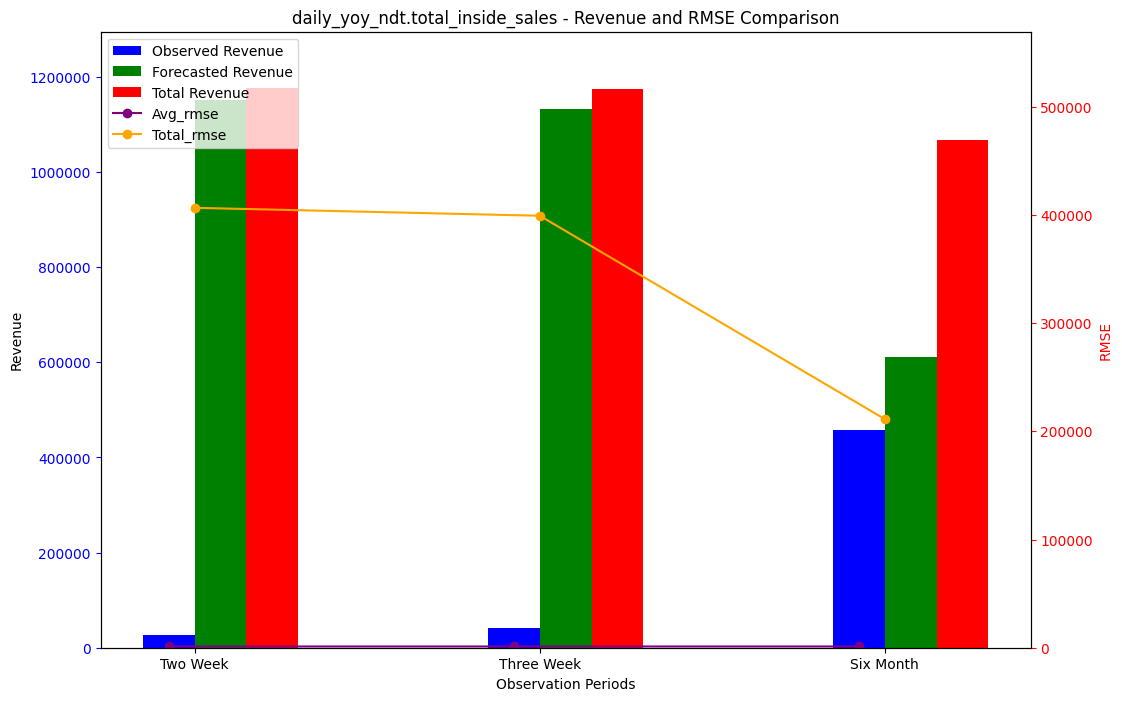

Plotting chart for daily_yoy_ndt.total_food_service


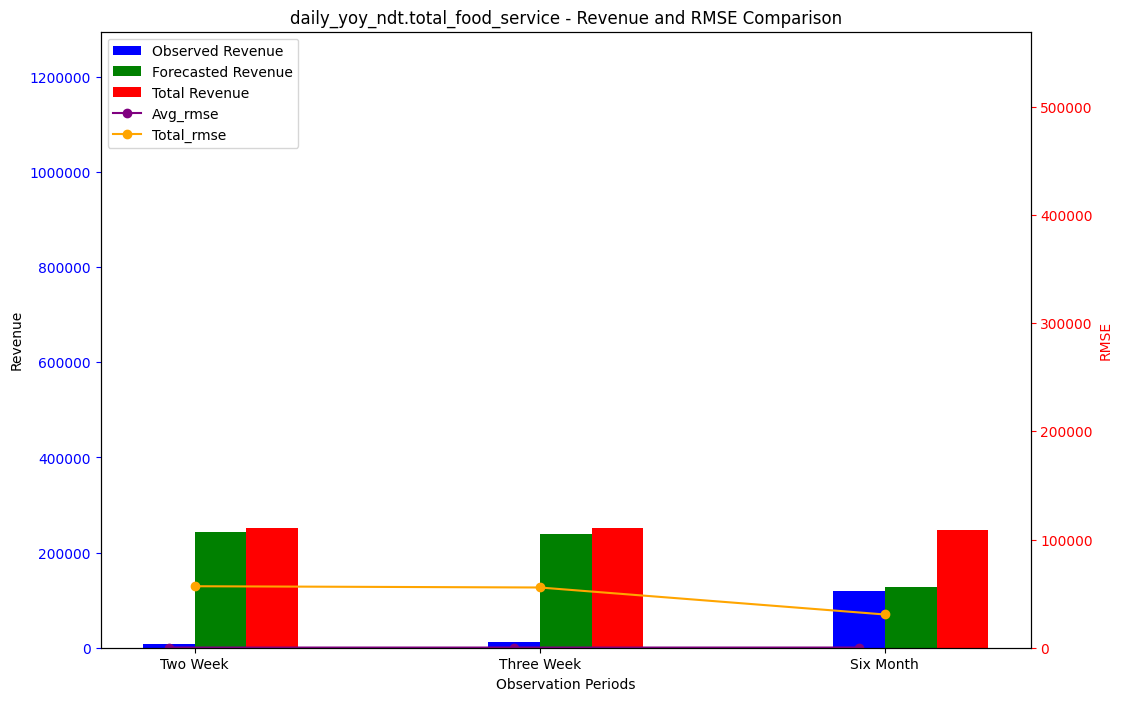

Plotting chart for diesel


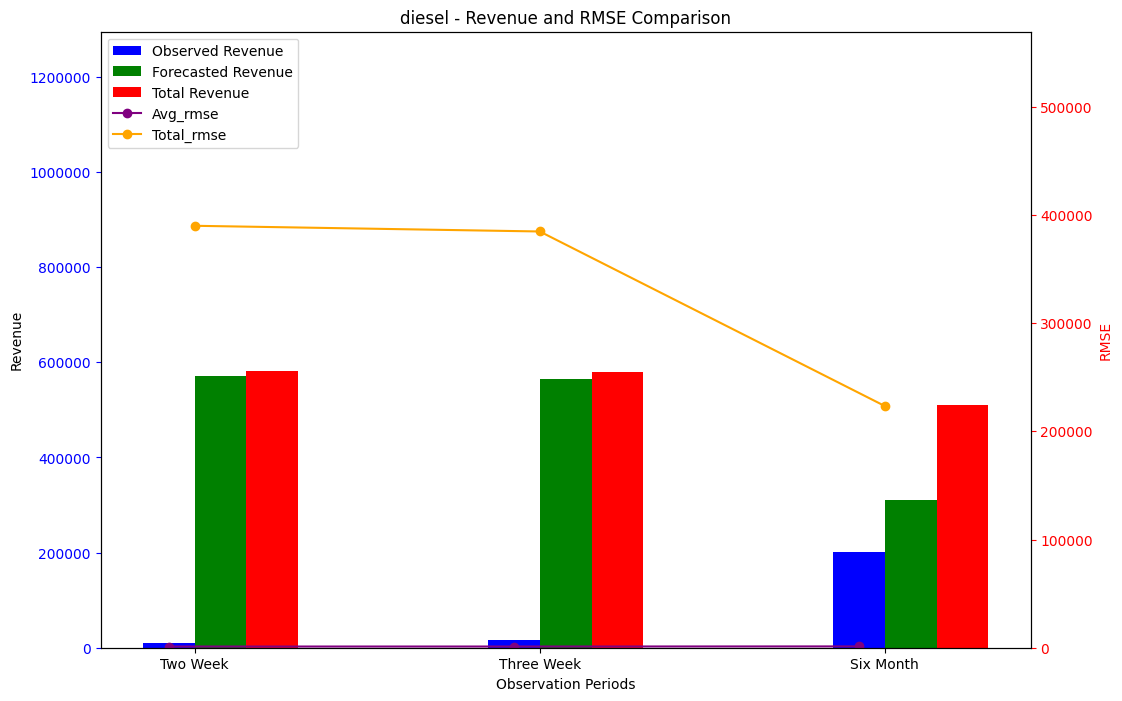

Plotting chart for unleaded


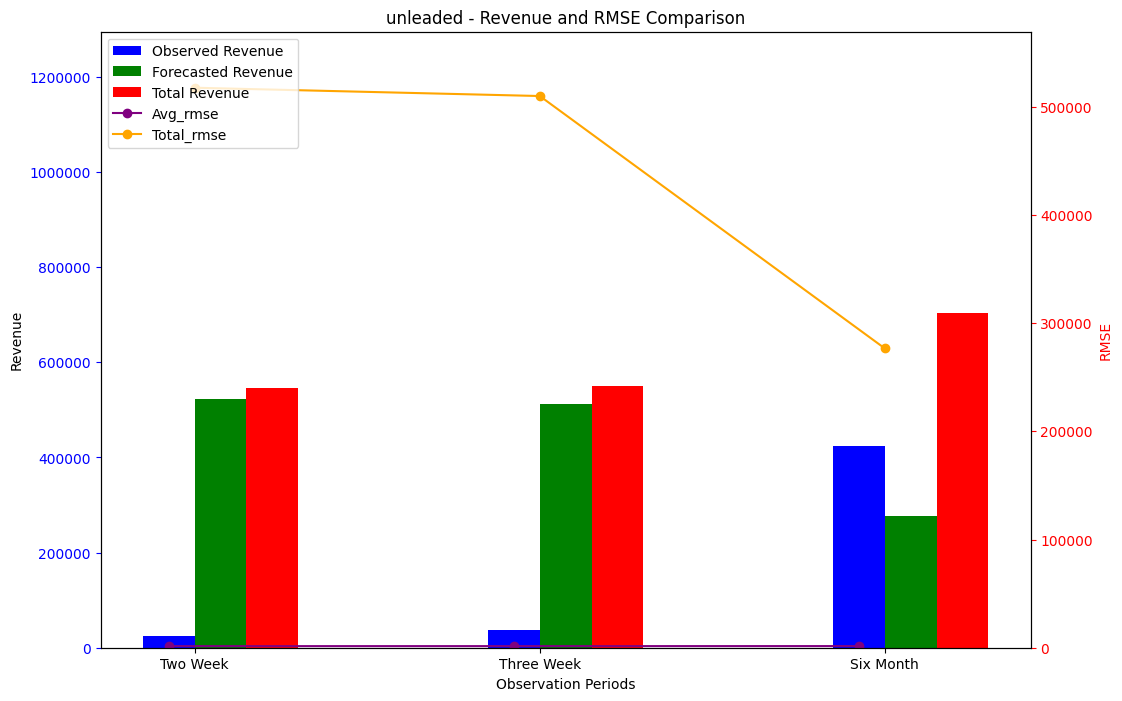

In [30]:
# Finding max values for scales
xgb_max_revenue, xgb_max_rmse = find_max_values([xgb_two_week_results, xgb_three_week_results, xgb_six_month_results])
revenue_limit = xgb_max_revenue * 1.1
rmse_limit = xgb_max_rmse * 1.1

# Plotting charts for each target variable
for target in targets:
    print(f"Plotting chart for {target}")
    plot_revenue_rmse_for_target(target, xgb_two_week_results, xgb_three_week_results, xgb_six_month_results)


In [31]:
from scipy.stats import uniform

# Define the parameter distribution
param_dist_xgb = {
    'estimator__n_estimators': sp_randint(100, 300),
    'estimator__learning_rate': uniform(0.01, 0.1),
    'estimator__max_depth': sp_randint(3, 10),
    'estimator__subsample': uniform(0.7, 0.3),
    'estimator__colsample_bytree': uniform(0.7, 0.3),
    'estimator__gamma': uniform(0, 0.5)
}

# Create RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(multioutput_xgb_regressor, param_distributions=param_dist_xgb,
                                       n_iter=5, cv=3, scoring='neg_mean_squared_error', random_state=101)

# Fit the model
random_search_xgb.fit(X_train, y_train)

# Best parameters
best_parameters_xgb = random_search_xgb.best_params_
print(f"Best parameters for XGBoost: {best_parameters_xgb}")

# Retrain model with the best parameters
multioutput_xgb_regressor.set_params(**best_parameters_xgb)
multioutput_xgb_regressor.fit(X_train, y_train)


Best parameters for XGBoost: {'estimator__colsample_bytree': 0.7227045692923634, 'estimator__gamma': 0.41282630407025067, 'estimator__learning_rate': 0.012549692083598487, 'estimator__max_depth': 5, 'estimator__n_estimators': 236, 'estimator__subsample': 0.8602759612329758}


MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.7227045692923634,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=0.41282630407025067,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.012549692083598487,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=236, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=101, ...))

In [32]:
# Run evaluations after tuning
tuned_xgb_two_week_results = forecast_and_evaluate(X_test, y_test, multioutput_xgb_regressor, 13, targets)
tuned_xgb_three_week_results = forecast_and_evaluate(X_test, y_test, multioutput_xgb_regressor, 20, targets)
tuned_xgb_six_month_results = forecast_and_evaluate(X_test, y_test, multioutput_xgb_regressor, 182, targets)

# Comparing results with difference for each observation period
print_comparison_with_difference(xgb_two_week_results, tuned_xgb_two_week_results, "Two Week Observation Period")
print_comparison_with_difference(xgb_three_week_results, tuned_xgb_three_week_results, "Three Week Observation Period")
print_comparison_with_difference(xgb_six_month_results, tuned_xgb_six_month_results, "Six Month Observation Period")


--- Two Week Observation Period ---
Before Tuning / After Tuning / Difference
daily_yoy_ndt.total_inside_sales:
  Observed Revenue: 26796.7434 / 26796.7434 / 0.0
  Projected Revenue: 1150746.1 / 1146305.3 / -4440.800000000047
  Total Revenue: 1177542.8434000001 / 1173102.0434 / -4440.800000000047
  Average RMSE: 1155.0230112882034 / 1053.6309580659913 / -101.3920532222121
  Total RMSE: 406568.0999734476 / 370878.09723922896 / -35690.002734218666
daily_yoy_ndt.total_food_service:
  Observed Revenue: 7849.337300000001 / 7849.337300000001 / 0.0
  Projected Revenue: 243170.25 / 234168.625 / -9001.625
  Total Revenue: 251019.5873 / 242017.9623 / -9001.625
  Average RMSE: 161.43903875313742 / 144.84005280416085 / -16.598985948976576
  Total RMSE: 56826.54164110437 / 50983.69858706462 / -5842.843054039753
diesel:
  Observed Revenue: 9388.877400000001 / 9388.877400000001 / 0.0
  Projected Revenue: 572274.3 / 528985.85 / -43288.45000000007
  Total Revenue: 581663.1774 / 538374.7274 / -43288.450

In [33]:
def plot_xgb_feature_importance_with_correlation(model, feature_names, model_name, target_variables, data, top_n=10):
    """
    Plots the top N most important features of the given model with color coding based on correlation.
    Adapted for models wrapped with MultiOutputRegressor.

    :param model: The trained MultiOutputRegressor model.
    :param feature_names: List of feature names.
    :param model_name: Name of the model (for title).
    :param target_variables: List of target variable names.
    :param data: DataFrame containing the features and targets.
    :param top_n: Number of top features to display.
    """
    # Extract feature importances from each estimator and average them
    feature_importances = np.mean([est.feature_importances_ for est in model.estimators_], axis=0)
    features = list(zip(feature_names, feature_importances))

    # Sort features by their importance and select top N features
    sorted_features = sorted(features, key=lambda x: x[1], reverse=True)
    top_features = sorted_features[:top_n]
    top_feature_names = [feature[0] for feature in top_features]

    # Calculating correlation with target variables
    correlations = data[top_feature_names + target_variables].corr()

    # Colors based on correlation
    colors = []
    for feature in top_feature_names:
        avg_corr = correlations.loc[feature, target_variables].mean()
        colors.append('green' if avg_corr >= 0 else 'red')

    # Plotting
    y_pos = np.arange(len(top_feature_names))
    top_importances = [feature[1] for feature in top_features]

    plt.figure(figsize=(10, 6))
    plt.barh(y_pos, top_importances, align='center', alpha=0.7, color=colors)
    plt.yticks(y_pos, top_feature_names)
    plt.xlabel('Importance')
    plt.title(f'Top {top_n} Features in {model_name}')
    plt.gca().invert_yaxis()
    plt.show()

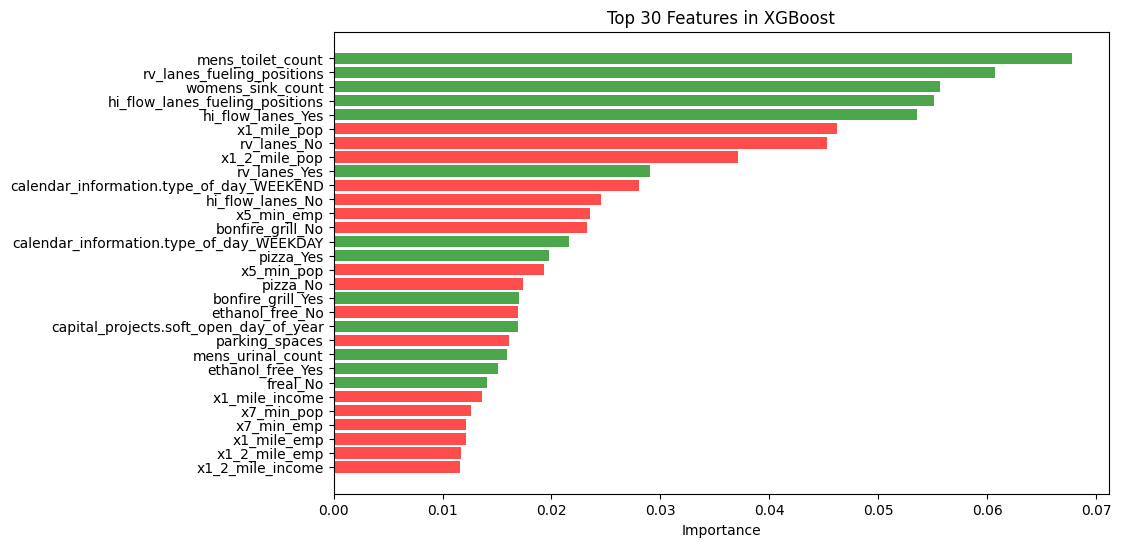

In [34]:
# Plotting feature importance for XGBoost
plot_xgb_feature_importance_with_correlation(
    multioutput_xgb_regressor,
    feature_names,
    'XGBoost',
    targets,
    encoded_df,
    top_n=30
)



In [35]:
from sklearn.svm import SVR

# Initialize SVR
svr = SVR()

# Wrap SVR with MultiOutputRegressor
multioutput_svr_regressor = MultiOutputRegressor(svr)

# Train the model on the training data
multioutput_svr_regressor.fit(X_train, y_train)


MultiOutputRegressor(estimator=SVR())

In [36]:
# Running the evaluations for SVR with different observation periods
svr_two_week_results = forecast_and_evaluate(X_test, y_test, multioutput_svr_regressor, 13, targets)
svr_three_week_results = forecast_and_evaluate(X_test, y_test, multioutput_svr_regressor, 20, targets)
svr_six_month_results = forecast_and_evaluate(X_test, y_test, multioutput_svr_regressor, 182, targets)

# Printing results
print_sales_forecast_details(svr_two_week_results[-1], svr_two_week_results[0], svr_two_week_results[1], "Two Week Observation Period")
print_sales_forecast_details(svr_three_week_results[-1], svr_three_week_results[0], svr_three_week_results[1], "Three Week Observation Period")
print_sales_forecast_details(svr_six_month_results[-1], svr_six_month_results[0], svr_six_month_results[1], "Six Month Observation Period")




--- Two Week Observation Period ---
daily_yoy_ndt.total_inside_sales:
  Observed Revenue: 26796.7434
  Projected Revenue: 961682.3150108643
  Total Revenue: 988479.0584108643
  Average RMSE: 616.5522764732967
  Total RMSE: 217026.40131860046
daily_yoy_ndt.total_food_service:
  Observed Revenue: 7849.337300000001
  Projected Revenue: 244768.06320416555
  Total Revenue: 252617.40050416556
  Average RMSE: 221.57193936895248
  Total RMSE: 77993.32265787126
diesel:
  Observed Revenue: 9388.877400000001
  Projected Revenue: 319572.66376998444
  Total Revenue: 328961.54116998444
  Average RMSE: 974.3133981885159
  Total RMSE: 342958.3161623576
unleaded:
  Observed Revenue: 24221.8676
  Projected Revenue: 754478.589544364
  Total Revenue: 778700.457144364
  Average RMSE: 1037.8822373970436
  Total RMSE: 365334.5475637593


--- Three Week Observation Period ---
daily_yoy_ndt.total_inside_sales:
  Observed Revenue: 41935.89750000001
  Projected Revenue: 942557.9840415353
  Total Revenue: 984493.

In [37]:
def svr_plot_revenue_rmse_for_target(target, two_week_results, three_week_results, six_month_results, revenue_limit, rmse_limit):
    periods = ['Two Week', 'Three Week', 'Six Month']
    metrics = ['observed', 'forecasted', 'total']
    rmse_metrics = ['avg_rmse', 'total_rmse']
    colors = ['blue', 'green', 'red', 'purple', 'orange']

    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Revenue Bar Chart
    bar_width = 0.15
    index = np.arange(len(periods))

    for i, metric in enumerate(metrics):
        data_to_plot = [two_week_results[-1][target][metric], three_week_results[-1][target][metric], six_month_results[-1][target][metric]]
        ax1.bar(index + i * bar_width, data_to_plot, bar_width, color=colors[i], label=f'{metric.capitalize()} Revenue')

    ax1.set_xlabel('Observation Periods')
    ax1.set_ylabel('Revenue')
    ax1.tick_params('y', colors='blue')
    ax1.set_ylim(0, revenue_limit)  # Consistent y-axis limit for revenue
    ax1.ticklabel_format(style='plain', axis='y')
    ax1.set_xticks(index + bar_width / 2)
    ax1.set_xticklabels(periods)
    ax1.set_title(f'{target} - Revenue and RMSE Comparison')

    # Secondary axis for RMSE
    ax2 = ax1.twinx()
    for i, rmse_metric in enumerate(rmse_metrics):
        rmse_data_to_plot = [two_week_results[0 if rmse_metric == 'avg_rmse' else 1][target], three_week_results[0 if rmse_metric == 'avg_rmse' else 1][target], six_month_results[0 if rmse_metric == 'avg_rmse' else 1][target]]
        ax2.plot(index + i * bar_width / 2, rmse_data_to_plot, color=colors[i + 3], marker='o', label=f'{rmse_metric.capitalize()}')

    ax2.set_ylabel('RMSE', color='red')
    ax2.tick_params('y', colors='red')
    ax2.set_ylim(0, rmse_limit)  # Adjusted y-axis limit for RMSE
    ax2.ticklabel_format(style='plain', axis='y')

    # Combine legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.show()

# Finding max values for scales for SVR model
svr_max_revenue, svr_max_rmse = find_max_values([svr_two_week_results, svr_three_week_results, svr_six_month_results])

# Adding a buffer to the max values for scale consistency
svr_revenue_limit = svr_max_revenue * 1.1  # 10% extra buffer
svr_rmse_limit = svr_max_rmse * 1.1  # 10% extra buffer

Plotting chart for daily_yoy_ndt.total_inside_sales


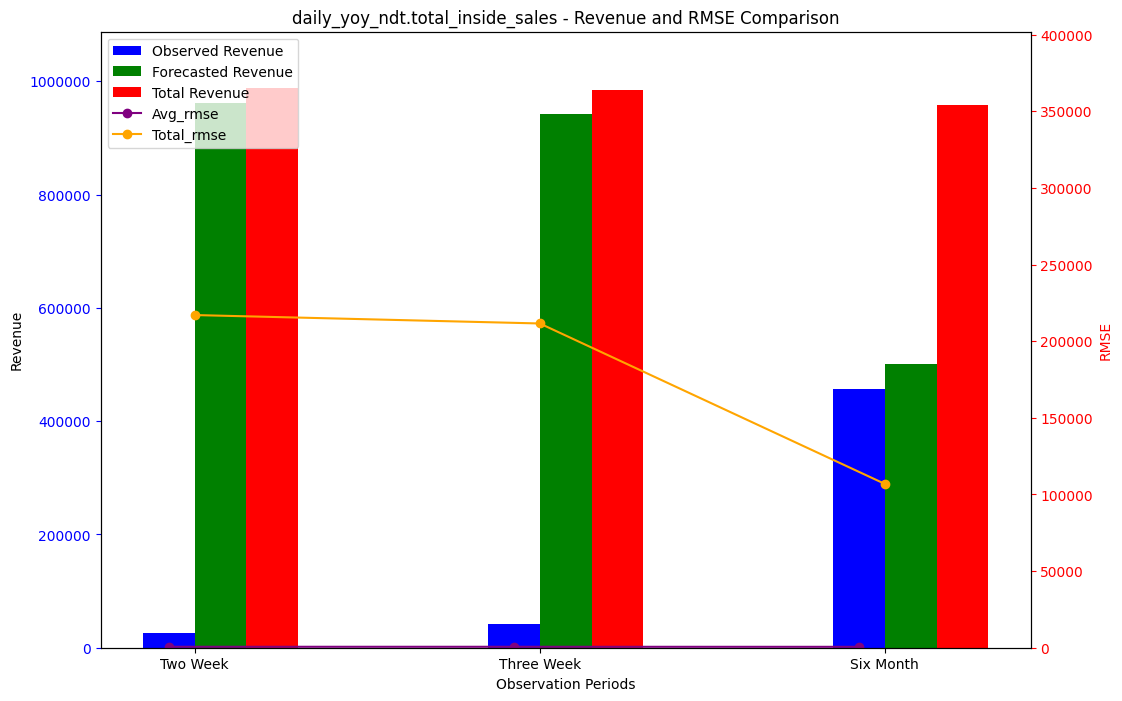

Plotting chart for daily_yoy_ndt.total_food_service


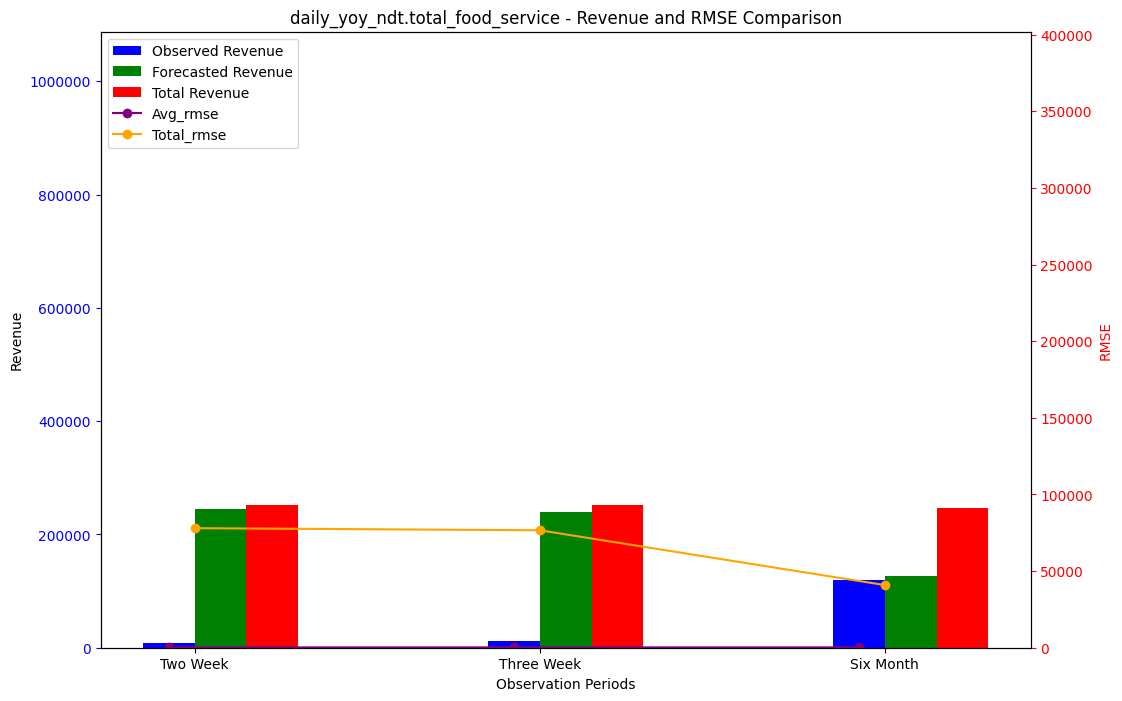

Plotting chart for diesel


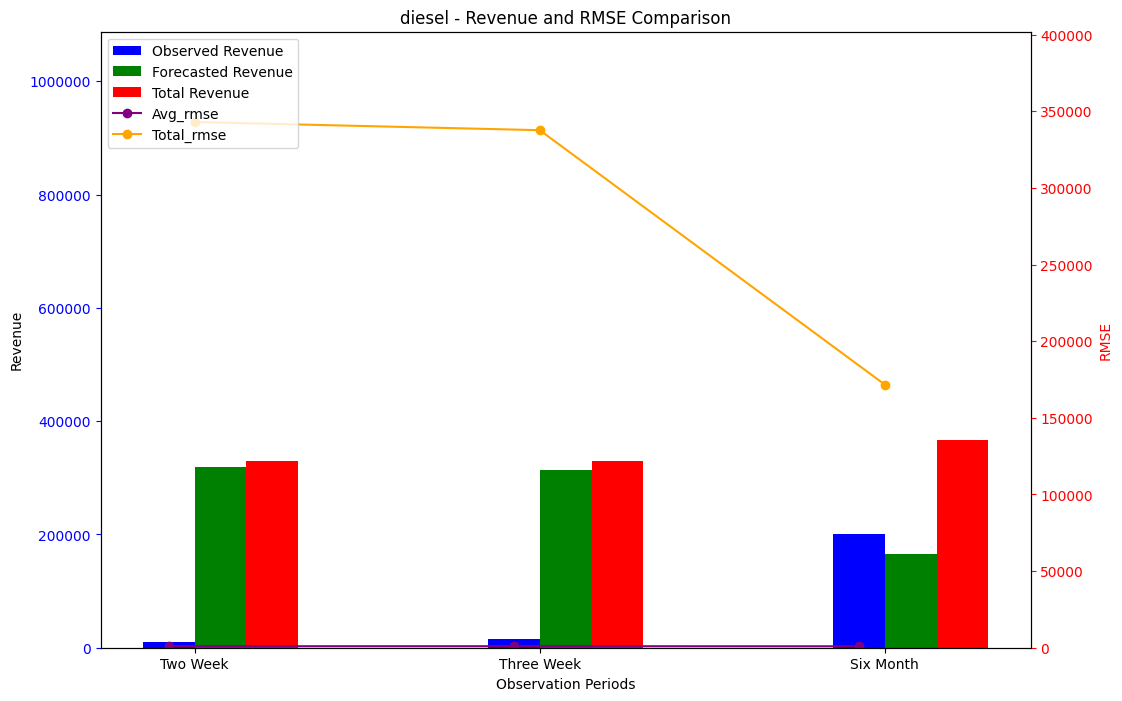

Plotting chart for unleaded


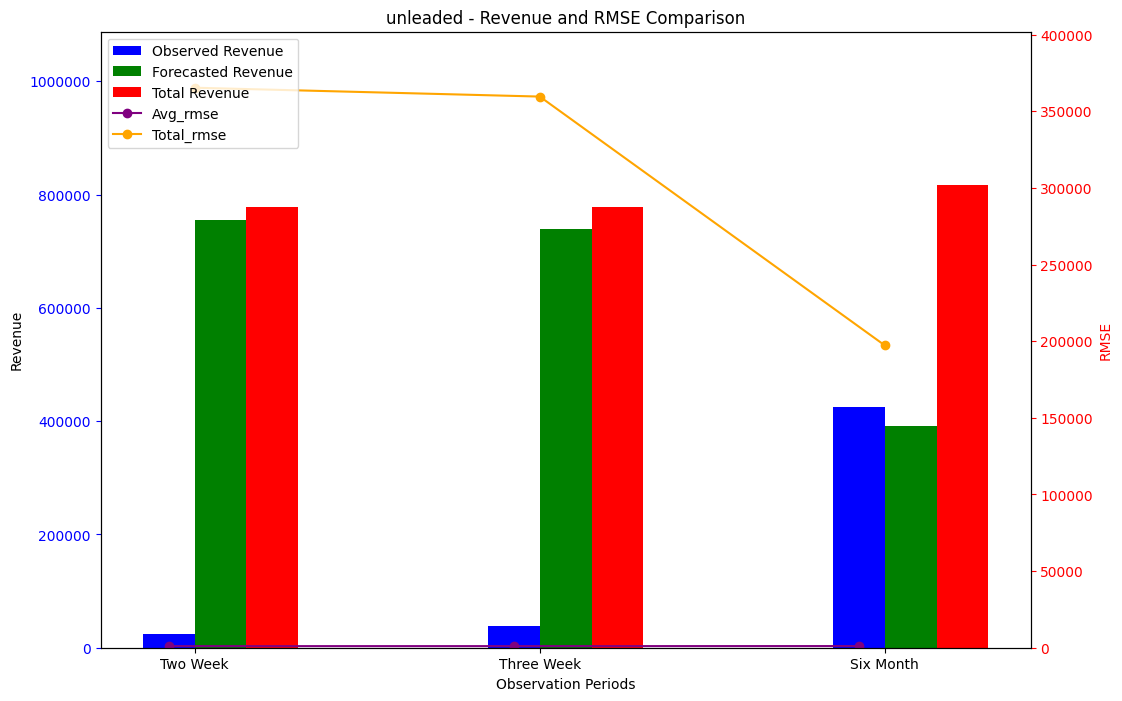

In [38]:

# Plotting charts for each target variable
for target in targets:
    print(f"Plotting chart for {target}")
    svr_plot_revenue_rmse_for_target(target, svr_two_week_results, svr_three_week_results, svr_six_month_results, svr_revenue_limit, svr_rmse_limit)

In [39]:
# Define the parameter distribution
param_dist_svr = {
    'estimator__C': uniform(0.1, 10),
    'estimator__gamma': ['scale', 'auto'],
    'estimator__epsilon': uniform(0.1, 1)
}

# Create RandomizedSearchCV
random_search_svr = RandomizedSearchCV(multioutput_svr_regressor, param_distributions=param_dist_svr,
                                       n_iter=3, cv=3, scoring='neg_mean_squared_error', random_state=69)

# Fit the model
random_search_svr.fit(X_train, y_train)

# Best parameters
best_parameters_svr = random_search_svr.best_params_
print(f"Best parameters for SVR: {best_parameters_svr}")

# Retrain model with the best parameters
multioutput_svr_regressor.set_params(**best_parameters_svr)
multioutput_svr_regressor.fit(X_train, y_train)

Best parameters for SVR: {'estimator__C': 3.0624916167243357, 'estimator__epsilon': 0.9090677156733267, 'estimator__gamma': 'scale'}


MultiOutputRegressor(estimator=SVR(C=3.0624916167243357,
                                   epsilon=0.9090677156733267))

In [40]:
# Run evaluations after tuning for SVR
tuned_svr_two_week_results = forecast_and_evaluate(X_test, y_test, multioutput_svr_regressor, 13, targets)
tuned_svr_three_week_results = forecast_and_evaluate(X_test, y_test, multioutput_svr_regressor, 20, targets)
tuned_svr_six_month_results = forecast_and_evaluate(X_test, y_test, multioutput_svr_regressor, 182, targets)

# Printing comparison results with differences for each observation period
print_comparison_with_difference(svr_two_week_results, tuned_svr_two_week_results, "Two Week Observation Period")
print_comparison_with_difference(svr_three_week_results, tuned_svr_three_week_results, "Three Week Observation Period")
print_comparison_with_difference(svr_six_month_results, tuned_svr_six_month_results, "Six Month Observation Period")



--- Two Week Observation Period ---
Before Tuning / After Tuning / Difference
daily_yoy_ndt.total_inside_sales:
  Observed Revenue: 26796.7434 / 26796.7434 / 0.0
  Projected Revenue: 961682.3150108643 / 974078.161525555 / +12395.846514690667
  Total Revenue: 988479.0584108643 / 1000874.904925555 / +12395.846514690667
  Average RMSE: 616.5522764732967 / 668.2747761626789 / +51.722499689382175
  Total RMSE: 217026.40131860046 / 235232.72120926296 / +18206.319890662504
daily_yoy_ndt.total_food_service:
  Observed Revenue: 7849.337300000001 / 7849.337300000001 / 0.0
  Projected Revenue: 244768.06320416555 / 258666.75061491513 / +13898.687410749582
  Total Revenue: 252617.40050416556 / 266516.0879149151 / +13898.687410749553
  Average RMSE: 221.57193936895248 / 260.9263679677774 / +39.35442859882494
  Total RMSE: 77993.32265787126 / 91846.08152465765 / +13852.75886678639
diesel:
  Observed Revenue: 9388.877400000001 / 9388.877400000001 / 0.0
  Projected Revenue: 319572.66376998444 / 302312.

In [41]:
def calculate_feature_averages(X_train):
    feature_averages = {}
    for col in X_train.columns:
        # For one-hot encoded features (binary values), use mode
        if X_train[col].nunique() == 2 and set(X_train[col].unique()) == {0, 1}:
            feature_averages[col] = X_train[col].mode()[0]
        else:
            # For numerical features, use mean
            feature_averages[col] = X_train[col].mean()
    return feature_averages

# Calculate averages
averages = calculate_feature_averages(X_train)

# Outputting the averages
for feature, average in averages.items():
    print(f"{feature}: {average}")



calendar.fiscal_week_id_for_year: 26.502305327868854
site_id_msba: 23052.96875
capital_projects.soft_open_year: 2021.34375
capital_projects.soft_open_day_of_year: 186.09375
calendar.calendar_day_year: 2021.8522028688524
calendar.calendar_day_day_of_year: 183.00845286885246
days_since_open: 182.5
open_year: 2021.34375
square_feet: 4943.6875
years_since_last_project: 1.625
parking_spaces: 36.875
x1_mile_pop: 6089.09375
x1_mile_emp: 4722.34375
x1_mile_income: 49951.28125
x1_2_mile_pop: 1658.53125
x1_2_mile_emp: 1587.40625
x1_2_mile_income: 43474.53125
x5_min_pop: 12903.09375
x5_min_emp: 8618.75
x5_min_inc: 52741.1875
x7_min_pop: 29092.125
x7_min_emp: 18225.3125
x7_min_inc: 58111.8125
traditional_forecourt_fueling_positions: 14.5
rv_lanes_fueling_positions: 2.65625
hi_flow_lanes_fueling_positions: 3.46875
mens_toilet_count: 2.40625
mens_urinal_count: 2.3125
womens_toilet_count: 4.625
womens_sink_count: 1.75
calendar.day_of_week_Friday: 0
calendar.day_of_week_Monday: 0
calendar.day_of_week_

In [42]:
# re-read in data from CSV files
df3 = pd.read_csv(file1_path)
df4 = pd.read_csv(file2_path)

In [43]:
# 1. Drop columns with only 1 unique value in df4
cols_to_drop = [col for col in df4.columns if df4[col].nunique() == 1]
df4.drop(cols_to_drop, axis=1, inplace=True)

# 2. Remove duplicate columns in df4
df4.drop(['hi_flow_lanes_fueling_positions_2', 'rv_lanes_fueling_positions_2'], axis=1, inplace=True)

# 3. Replace 'N/A' with 'Not Applicable' in df4
df4.replace('N/A', 'Not Applicable', inplace=True)

# 4. Extract year and day of the year from date columns in df3
df3['capital_projects.soft_open_year'] = pd.to_datetime(df3['capital_projects.soft_opening_date']).dt.year
df3['capital_projects.soft_open_day_of_year'] = pd.to_datetime(df3['capital_projects.soft_opening_date']).dt.dayofyear

df3['calendar.calendar_day_year'] = pd.to_datetime(df3['calendar.calendar_day_date']).dt.year
df3['calendar.calendar_day_day_of_year'] = pd.to_datetime(df3['calendar.calendar_day_date']).dt.dayofyear

# 5. Add 'days_since_open' column to df3
df3['days_since_open'] = (pd.to_datetime(df3['calendar.calendar_day_date']) - pd.to_datetime(df3['capital_projects.soft_opening_date'])).dt.days

# 6. Drop the original date columns if they are no longer needed
df3.drop(['capital_projects.soft_opening_date', 'calendar.calendar_day_date'], axis=1, inplace=True)

# 7. Remove 'Unnamed: 0' column from df3
df3.drop('Unnamed: 0', axis=1, inplace=True)

# 8. Remove 'Unnamed: 0' column from df4
df4.drop('Unnamed: 0', axis=1, inplace=True)


In [44]:
# Display the entire df4 dataframe
pd.set_option('display.max_rows', None)  # Ensure all rows are shown
display(df4)

# Print the data types of each column
print("\nData Types of Each Column:")
print(df4.dtypes)

,open_year,square_feet,years_since_last_project,parking_spaces,lottery,freal,bonfire_grill,pizza,cinnabon,ethanol_free,hi_flow_lanes,rv_lanes,hi_flow_rv_lanes,def,cat_scales,rv_dumps,propane,x1_mile_pop,x1_mile_emp,x1_mile_income,x1_2_mile_pop,x1_2_mile_emp,x1_2_mile_income,x5_min_pop,x5_min_emp,x5_min_inc,x7_min_pop,x7_min_emp,x7_min_inc,traditional_forecourt_fueling_positions,traditional_forecourt_layout,traditional_forecourt_stack_type,rv_lanes_fueling_positions,rv_lanes_layout,rv_lanes_stack_type,hi_flow_lanes_fueling_positions,hi_flow_lanes_layout,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,site_id_msba
0,2021,5046,2,38,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,4046,3648,43435,556,642,45678,4776,5364,41725,13895,7906,46043,20,Stack,Large,6,Stack,HF/RV,4,Stack,Stack,HF/RV,2,2,6,2,21560
1,2021,5046,2,39,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,101,665,39638,0,158,0,222,2286,42426,13058,10235,51342,24,Stack,Large,4,Stack,HF/RV,9,Combo,Combo,HF/RV,5,5,10,4,21980
2,2021,5046,2,35,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,7676,2858,61175,1462,675,61401,18475,7113,54560,31821,10437,54037,12,In-Line,None,5,In-Line,None,0,NaN,In-Line,None,3,2,4,1,22015
3,2021,5046,2,36,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,0,3868,0,0,1330,0,0,6320,0,688,9600,48170,12,In-Line,None,4,Stack,HF/RV,5,Combo,Combo,HF/RV,3,3,6,2,22085
4,2021,5046,2,25,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,Yes,7693,5427,46356,2367,1169,47021,17379,24297,63425,33146,37271,64854,20,Stack,Large,0,NaN,NaN,0,NaN,NaN,NaN,0,0,0,0,22120
5,2021,5046,2,38,Yes,Yes,No,No,No,Yes,No,No,No,No,No,No,Yes,11024,7617,39538,2103,1616,27847,12789,1715,80976,32791,3514,77818,12,In-Line,None,0,NaN,NaN,0,NaN,NaN,NaN,4,2,4,2,22260
6,2021,5046,2,36,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,No,Yes,5790,8767,36451,404,1877,44706,21932,23814,36669,70749,82336,38864,12,In-Line,None,4,Stack,HF/RV,7,Combo,Combo,HF/RV,3,3,6,2,22330
7,2021,5046,1,38,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,3208,2525,28559,806,1360,26712,16235,10912,35576,24597,14637,40918,20,Stack,Large,4,Stack,HF/RV,5,Combo,Combo,HF/RV,3,3,6,2,22400
8,2021,5046,2,41,Yes,Yes,No,No,No,No,No,No,No,No,No,No,Yes,12360,12313,33034,5377,2285,29962,25110,34199,41009,65114,83985,52824,12,In-Line,None,0,NaN,NaN,0,NaN,NaN,NaN,2,2,4,1,22505
9,2021,5046,2,39,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,671,2982,83015,262,372,84038,9799,14726,62057,41138,38959,55130,12,In-Line,None,4,Stack,HF/RV,5,Combo,Combo,HF/RV,3,3,6,2,22540



Data Types of Each Column:
open_year                                   int64
square_feet                                 int64
years_since_last_project                    int64
parking_spaces                              int64
lottery                                    object
freal                                      object
bonfire_grill                              object
pizza                                      object
cinnabon                                   object
ethanol_free                               object
hi_flow_lanes                              object
rv_lanes                                   object
hi_flow_rv_lanes                           object
def                                        object
cat_scales                                 object
rv_dumps                                   object
propane                                    object
x1_mile_pop                                 int64
x1_mile_emp                                 int64
x1_mile_income        

In [45]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode object-type columns
encoder = OneHotEncoder(sparse=False, drop='first')
df4_encoded = pd.DataFrame(encoder.fit_transform(df4.select_dtypes('object')))
df4_encoded.columns = encoder.get_feature_names_out(df4.select_dtypes('object').columns)
df4_encoded.index = df4.index

# Concatenate the encoded dataframe with the original dataframe
df4 = pd.concat([df4.drop(df4.select_dtypes('object').columns, axis=1), df4_encoded], axis=1)

# Impute the mean for integer variables (except specified columns)
mean_values = df4.drop(['site_id_msba', 'open_year', 'years_since_last_project'], axis=1).mean()
df4.fillna(mean_values, inplace=True)

# Create a new row with imputed values, 2023 for open_year, 0 for years_since_last_project, and 101 for site_id_msba
new_row = df4.mean()
new_row['site_id_msba'] = 101
new_row['open_year'] = 2023
new_row['years_since_last_project'] = 0

# Append the new row to the dataframe
df4 = df4.append(new_row, ignore_index=True)

# Display the last few rows to confirm the new row addition
df4.tail()


,open_year,square_feet,years_since_last_project,parking_spaces,x1_mile_pop,x1_mile_emp,x1_mile_income,x1_2_mile_pop,x1_2_mile_emp,x1_2_mile_income,x5_min_pop,x5_min_emp,x5_min_inc,x7_min_pop,x7_min_emp,x7_min_inc,traditional_forecourt_fueling_positions,rv_lanes_fueling_positions,hi_flow_lanes_fueling_positions,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,site_id_msba,lottery_Yes,freal_Yes,bonfire_grill_Yes,pizza_Yes,cinnabon_Yes,ethanol_free_Yes,hi_flow_lanes_Yes,rv_lanes_Yes,hi_flow_rv_lanes_Yes,def_Yes,cat_scales_Yes,rv_dumps_Yes,propane_Yes,traditional_forecourt_layout_Stack,traditional_forecourt_stack_type_Large,traditional_forecourt_stack_type_None,rv_lanes_layout_Stack,rv_lanes_layout_nan,rv_lanes_stack_type_None,rv_lanes_stack_type_nan,hi_flow_lanes_layout_Stack,hi_flow_lanes_layout_nan,hi_flow_rv_lanes_layout_In-Line,hi_flow_rv_lanes_layout_Stack,hi_flow_rv_lanes_layout_nan,hi_flow_rv_lanes_stack_type_None,hi_flow_rv_lanes_stack_type_nan
33,2022.0,2933.00000,1.0,30.000000,3629.000000,1074.000000,62410.000000,1003.000000,656.000000,59375.000000,15721.000000,3847.000000,63822.000000,26142.000000,9630.000000,60636.000000,16.00000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,24150.0,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
34,2022.0,4388.00000,1.0,40.000000,11276.000000,549.000000,75932.000000,3880.000000,337.000000,75316.000000,13716.000000,722.000000,78489.000000,14427.000000,764.000000,78691.000000,10.00000,0.000000,0.000000,1.000000,1.000000,4.000000,2.000000,24220.0,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
35,2022.0,5951.00000,1.0,49.000000,164.000000,271.000000,56255.000000,11.000000,167.000000,0.000000,722.000000,501.000000,56379.000000,768.000000,710.000000,56211.000000,12.00000,4.000000,5.000000,3.000000,3.000000,2.000000,2.000000,24255.0,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.00000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
36,2022.0,4630.00000,1.0,45.000000,490.000000,151.000000,78177.000000,119.000000,34.000000,67069.000000,1876.000000,456.000000,82839.000000,2372.000000,615.000000,85659.000000,12.00000,4.000000,5.000000,1.000000,1.000000,2.000000,2.000000,24535.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37,2023.0,4970.27027,0.0,37.405405,6703.567568,4757.648649,53300.378378,1833.108108,1514.135135,47012.405405,14528.702703,9121.972973,55292.135135,32303.621622,19224.054054,59849.837838,14.27027,2.513514,3.324324,2.378378,2.351351,4.648649,1.702703,101.0,0.621622,0.972973,0.702703,0.405405,0.054054,0.702703,0.594595,0.621622,0.594595,0.621622,0.135135,0.351351,0.837838,0.27027,0.243243,0.72973,0.594595,0.378378,0.027027,0.378378,0.027027,0.405405,0.027027,0.027027,0.378378,0.027027,0.378378


In [46]:
# Display the entire df4 dataframe
pd.set_option('display.max_rows', 400)  # Ensure all rows are shown
display(df3)

# Print the data types of each column
print("\nData Types of Each Column:")
print(df3.dtypes)

,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba,capital_projects.soft_open_year,capital_projects.soft_open_day_of_year,calendar.calendar_day_year,calendar.calendar_day_day_of_year,days_since_open
0,25,Friday,NONE,WEEKDAY,2168.2920,861.6930,722.7745,1425.1020,24535,2022,165,2022,168,3
1,25,Wednesday,NONE,WEEKDAY,2051.5635,808.0275,730.4850,1436.2740,24535,2022,165,2022,173,8
2,25,Thursday,NONE,WEEKDAY,2257.5000,966.4410,895.7970,1594.3725,24535,2022,165,2022,174,9
3,26,Sunday,NONE,WEEKEND,1520.5925,542.3250,584.2900,1124.9280,24535,2022,165,2022,177,12
4,26,Monday,NONE,WEEKDAY,1897.6930,771.4525,852.2605,1640.2540,24535,2022,165,2022,178,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13903,52,Tuesday,NONE,WEEKDAY,2984.0300,864.2795,1609.7830,2492.5180,21560,2021,12,2021,362,350
13904,1,Saturday,New Year's Day,WEEKEND,2483.4145,597.8315,731.2935,1564.0170,21560,2021,12,2022,1,354
13905,1,Tuesday,NONE,WEEKDAY,3169.6875,970.4100,1851.6470,2767.5970,21560,2021,12,2022,4,357
13906,2,Friday,NONE,WEEKDAY,3559.5805,1072.4175,2104.9070,2868.2325,21560,2021,12,2022,7,360



Data Types of Each Column:
calendar.fiscal_week_id_for_year            int64
calendar.day_of_week                       object
calendar_information.holiday               object
calendar_information.type_of_day           object
daily_yoy_ndt.total_inside_sales          float64
daily_yoy_ndt.total_food_service          float64
diesel                                    float64
unleaded                                  float64
site_id_msba                                int64
capital_projects.soft_open_year             int64
capital_projects.soft_open_day_of_year      int64
calendar.calendar_day_year                  int64
calendar.calendar_day_day_of_year           int64
days_since_open                             int64
dtype: object


In [47]:
from collections import Counter
import calendar

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Analyzing existing data to find common holiday dates
holiday_data = df3[df3['calendar_information.holiday'] != 'NONE']
holidays = holiday_data.groupby(['calendar_information.holiday', 'calendar.calendar_day_day_of_year']).size().reset_index(name='counts')
holidays = holidays.sort_values('counts', ascending=False).drop_duplicates('calendar_information.holiday')

# Extract the most common day of the year for each holiday
holiday_dates = {row['calendar_information.holiday']: row['calendar.calendar_day_day_of_year'] for index, row in holidays.iterrows()}

# Function to determine if a given day is a holiday
def is_holiday(day_of_year):
    for holiday, day in holiday_dates.items():
        if day_of_year == day:
            return holiday
    return 'NONE'

# Function to get the next day of the week
def next_day(current_day):
    days = list(calendar.day_name)
    next_index = (days.index(current_day) + 1) % 7
    return days[next_index]

# Initialize the first row for site_id_msba = 101
first_row = {
    'calendar.fiscal_week_id_for_year': 1,
    'calendar.day_of_week': 'Sunday',
    'calendar_information.holiday': is_holiday(1),
    'calendar_information.type_of_day': 'WEEKEND',
    'daily_yoy_ndt.total_inside_sales': 0.0,
    'daily_yoy_ndt.total_food_service': 0.0,
    'diesel': 0.0,
    'unleaded': 0.0,
    'site_id_msba': 101,
    'capital_projects.soft_open_year': 2023,
    'capital_projects.soft_open_day_of_year': 1,
    'calendar.calendar_day_year': 2023,
    'calendar.calendar_day_day_of_year': 1,
    'days_since_open': 0
}

# DataFrame to hold new site data
new_site_data = pd.DataFrame([first_row])

# Generate the remaining 364 rows
current_day_of_week = first_row['calendar.day_of_week']
for day in range(1, 365):
    current_day_of_week = next_day(current_day_of_week)
    day_of_year = day + 1
    new_row = {
        'calendar.fiscal_week_id_for_year': (day_of_year - 1) // 7 + 1,
        'calendar.day_of_week': current_day_of_week,
        'calendar_information.holiday': is_holiday(day_of_year),
        'calendar_information.type_of_day': 'WEEKEND' if current_day_of_week in ['Saturday', 'Sunday'] else 'WEEKDAY',
        'daily_yoy_ndt.total_inside_sales': 0.0,
        'daily_yoy_ndt.total_food_service': 0.0,
        'diesel': 0.0,
        'unleaded': 0.0,
        'site_id_msba': 101,
        'capital_projects.soft_open_year': 2023,
        'capital_projects.soft_open_day_of_year': 1,
        'calendar.calendar_day_year': 2023,
        'calendar.calendar_day_day_of_year': day_of_year,
        'days_since_open': day
    }
    new_site_data = new_site_data.append(new_row, ignore_index=True)

# Insert the new rows into df3
df3 = df3.append(new_site_data, ignore_index=True)

# Display the last few rows to confirm holidays
df3.tail(10)

,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba,capital_projects.soft_open_year,capital_projects.soft_open_day_of_year,calendar.calendar_day_year,calendar.calendar_day_day_of_year,days_since_open
14263,51,Friday,NONE,WEEKDAY,0.0,0.0,0.0,0.0,101,2023,1,2023,356,355
14264,51,Saturday,NONE,WEEKEND,0.0,0.0,0.0,0.0,101,2023,1,2023,357,356
14265,52,Sunday,Christmas Eve,WEEKEND,0.0,0.0,0.0,0.0,101,2023,1,2023,358,357
14266,52,Monday,Christmas Day,WEEKDAY,0.0,0.0,0.0,0.0,101,2023,1,2023,359,358
14267,52,Tuesday,NONE,WEEKDAY,0.0,0.0,0.0,0.0,101,2023,1,2023,360,359
14268,52,Wednesday,NONE,WEEKDAY,0.0,0.0,0.0,0.0,101,2023,1,2023,361,360
14269,52,Thursday,NONE,WEEKDAY,0.0,0.0,0.0,0.0,101,2023,1,2023,362,361
14270,52,Friday,NONE,WEEKDAY,0.0,0.0,0.0,0.0,101,2023,1,2023,363,362
14271,52,Saturday,NONE,WEEKEND,0.0,0.0,0.0,0.0,101,2023,1,2023,364,363
14272,53,Sunday,New Year's Eve,WEEKEND,0.0,0.0,0.0,0.0,101,2023,1,2023,365,364


In [48]:
# One-hot encoding all object type columns in df3
df3_encoded = pd.get_dummies(df3, columns=df3.select_dtypes(include=['object']).columns, drop_first=True)

# Displaying the first few rows to verify the changes
df3_encoded.head()


,calendar.fiscal_week_id_for_year,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba,capital_projects.soft_open_year,capital_projects.soft_open_day_of_year,calendar.calendar_day_year,calendar.calendar_day_day_of_year,days_since_open,calendar.day_of_week_Monday,calendar.day_of_week_Saturday,calendar.day_of_week_Sunday,calendar.day_of_week_Thursday,calendar.day_of_week_Tuesday,calendar.day_of_week_Wednesday,calendar_information.holiday_Ascension,calendar_information.holiday_Christmas Day,calendar_information.holiday_Christmas Eve,calendar_information.holiday_Columbus Day,calendar_information.holiday_Easter,calendar_information.holiday_Father's Day,calendar_information.holiday_Flag Day,calendar_information.holiday_Good Friday,calendar_information.holiday_Halloween Day,calendar_information.holiday_Independence Day,calendar_information.holiday_Labor Day,calendar_information.holiday_Lincoln's Birthday,calendar_information.holiday_Martin Luther King Day,calendar_information.holiday_Memorial Day,calendar_information.holiday_Mother's Day,calendar_information.holiday_NONE,calendar_information.holiday_New Year's Day,calendar_information.holiday_New Year's Eve,calendar_information.holiday_Palm Sunday,calendar_information.holiday_President's Day,calendar_information.holiday_Saint Patrick's Day,calendar_information.holiday_Saint Valentine's Day,calendar_information.holiday_Thanksgiving Day,calendar_information.holiday_Veteran's Day,calendar_information.holiday_Washington's Birthday,calendar_information.type_of_day_WEEKEND
0,25,2168.2920,861.6930,722.7745,1425.1020,24535,2022,165,2022,168,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,25,2051.5635,808.0275,730.4850,1436.2740,24535,2022,165,2022,173,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,25,2257.5000,966.4410,895.7970,1594.3725,24535,2022,165,2022,174,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,26,1520.5925,542.3250,584.2900,1124.9280,24535,2022,165,2022,177,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,26,1897.6930,771.4525,852.2605,1640.2540,24535,2022,165,2022,178,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [49]:
# Merging df3 and df4 on 'site_id_msba'
merged_df = pd.merge(df3_encoded, df4, on='site_id_msba', how='left')

# Displaying the first few rows of the merged dataframe to confirm the merge
merged_df.head()


,calendar.fiscal_week_id_for_year,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba,capital_projects.soft_open_year,capital_projects.soft_open_day_of_year,calendar.calendar_day_year,calendar.calendar_day_day_of_year,days_since_open,calendar.day_of_week_Monday,calendar.day_of_week_Saturday,calendar.day_of_week_Sunday,calendar.day_of_week_Thursday,calendar.day_of_week_Tuesday,calendar.day_of_week_Wednesday,calendar_information.holiday_Ascension,calendar_information.holiday_Christmas Day,calendar_information.holiday_Christmas Eve,calendar_information.holiday_Columbus Day,calendar_information.holiday_Easter,calendar_information.holiday_Father's Day,calendar_information.holiday_Flag Day,calendar_information.holiday_Good Friday,calendar_information.holiday_Halloween Day,calendar_information.holiday_Independence Day,calendar_information.holiday_Labor Day,calendar_information.holiday_Lincoln's Birthday,calendar_information.holiday_Martin Luther King Day,calendar_information.holiday_Memorial Day,calendar_information.holiday_Mother's Day,calendar_information.holiday_NONE,calendar_information.holiday_New Year's Day,calendar_information.holiday_New Year's Eve,calendar_information.holiday_Palm Sunday,calendar_information.holiday_President's Day,calendar_information.holiday_Saint Patrick's Day,calendar_information.holiday_Saint Valentine's Day,calendar_information.holiday_Thanksgiving Day,calendar_information.holiday_Veteran's Day,calendar_information.holiday_Washington's Birthday,calendar_information.type_of_day_WEEKEND,open_year,square_feet,years_since_last_project,parking_spaces,x1_mile_pop,x1_mile_emp,x1_mile_income,x1_2_mile_pop,x1_2_mile_emp,x1_2_mile_income,x5_min_pop,x5_min_emp,x5_min_inc,x7_min_pop,x7_min_emp,x7_min_inc,traditional_forecourt_fueling_positions,rv_lanes_fueling_positions,hi_flow_lanes_fueling_positions,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,lottery_Yes,freal_Yes,bonfire_grill_Yes,pizza_Yes,cinnabon_Yes,ethanol_free_Yes,hi_flow_lanes_Yes,rv_lanes_Yes,hi_flow_rv_lanes_Yes,def_Yes,cat_scales_Yes,rv_dumps_Yes,propane_Yes,traditional_forecourt_layout_Stack,traditional_forecourt_stack_type_Large,traditional_forecourt_stack_type_None,rv_lanes_layout_Stack,rv_lanes_layout_nan,rv_lanes_stack_type_None,rv_lanes_stack_type_nan,hi_flow_lanes_layout_Stack,hi_flow_lanes_layout_nan,hi_flow_rv_lanes_layout_In-Line,hi_flow_rv_lanes_layout_Stack,hi_flow_rv_lanes_layout_nan,hi_flow_rv_lanes_stack_type_None,hi_flow_rv_lanes_stack_type_nan
0,25,2168.2920,861.6930,722.7745,1425.1020,24535,2022,165,2022,168,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2022.0,4630.0,1.0,45.0,490.0,151.0,78177.0,119.0,34.0,67069.0,1876.0,456.0,82839.0,2372.0,615.0,85659.0,12.0,4.0,5.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25,2051.5635,808.0275,730.4850,1436.2740,24535,2022,165,2022,173,8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2022.0,4630.0,1.0,45.0,490.0,151.0,78177.0,119.0,34.0,67069.0,1876.0,456.0,82839.0,2372.0,615.0,85659.0,12.0,4.0,5.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25,2257.5000,966.4410,895.7970,1594.3725,24535,2022,165,2022,174,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2022.0,4630.0,1.0,45.0,490.0,151.0,78177.0,119.0,34.0,67069.0,1876.0,456.0,82839.0,2372.0,615.0,85659.0,12.0,4.0,5.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26,1520.5925,542.3250,584.2900,1124.9280,24535,2022,165,2022,177,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2022.0,4630.0,1.0,45.0,490.0,151.0,78177.0,119.0,34.0,67069.0,1876.0,456.0,82839.0,2372.0,615.0,85659.0,12.0,4.0,5.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.

In [50]:
# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Defining the target variables
target_vars = ['daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service', 'diesel', 'unleaded']

# Splitting the data into features and targets
X = merged_df.drop(target_vars, axis=1)
y = merged_df[target_vars]

# Creating training set (site_id_msba != 101)
X_train = X[X['site_id_msba'] != 101]
y_train = y[X['site_id_msba'] != 101]

# Creating forecasting set (site_id_msba == 101)
X_forecast = X[X['site_id_msba'] == 101]
y_forecast = y[X['site_id_msba'] == 101]  # Initially empty or zero-filled, to be predicted

# Dropping 'site_id_msba' from X_train and X_forecast as it's not a feature for modeling
X_train.drop('site_id_msba', axis=1, inplace=True)
X_forecast.drop('site_id_msba', axis=1, inplace=True)


In [52]:
from xgboost import XGBRegressor

# Initialize the XGBRegressor
xgb_regressor = XGBRegressor()

# Wrap XGBRegressor with MultiOutputRegressor
multioutput_xgb_regressor = MultiOutputRegressor(xgb_regressor)

# Train the model on the training data
multioutput_xgb_regressor.fit(X_train, y_train)

# Making predictions on the forecasting set
y_forecast_predicted = multioutput_xgb_regressor.predict(X_forecast)

# Replace the zeros in y_forecast with the predictions
y_forecast.loc[:, :] = y_forecast_predicted

# Calculating total first year revenue
total_first_year_revenue = y_forecast.sum(axis=1).sum()

def forecast_total_revenue(X_forecast, model):
    # Forecasting using the model
    y_forecast_predicted = model.predict(X_forecast)

    # Summing up all the predicted values to get the total revenue
    total_revenue = np.sum(y_forecast_predicted)

    # Updating y_forecast with predicted values (to keep the change within this function)
    y_forecast.loc[:, :] = y_forecast_predicted

    return total_revenue

# Call the function and display the result
total_revenue_forecast = forecast_total_revenue(X_forecast, multioutput_xgb_regressor)
print(f"Total first year revenue forecast: {total_revenue_forecast}")


Total first year revenue forecast: 2607263.0


In [53]:
# Initialize the XGBRegressor
xgb_regressor = XGBRegressor()

# Wrap XGBRegressor with MultiOutputRegressor
multioutput_xgb_regressor = MultiOutputRegressor(xgb_regressor)

# Set the best parameters from the first model run
multioutput_xgb_regressor.set_params(**best_parameters_xgb)

# Train the model on the training data
multioutput_xgb_regressor.fit(X_train, y_train)

# Making predictions on the forecasting set
y_forecast_predicted = multioutput_xgb_regressor.predict(X_forecast)

# Replace the zeros in y_forecast with the predictions
y_forecast.loc[:, :] = y_forecast_predicted

# Calculating total first year revenue
total_first_year_revenue = y_forecast.sum(axis=1).sum()

def forecast_total_revenue(X_forecast, model):
    # Forecasting using the model
    y_forecast_predicted = model.predict(X_forecast)

    # Summing up all the predicted values to get the total revenue
    total_revenue = np.sum(y_forecast_predicted)

    # Updating y_forecast with predicted values (to keep the change within this function)
    y_forecast.loc[:, :] = y_forecast_predicted

    return total_revenue

# Call the function and display the result
total_revenue_forecast = forecast_total_revenue(X_forecast, multioutput_xgb_regressor)
print(f"Total first year revenue forecast: {total_revenue_forecast}")


Total first year revenue forecast: 2473558.5
